In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -*- coding: utf-8 -*-
"""
Spyder Editor
This is a temporary script file.
"""
# %% 
# Make sure to run from Users/eabernal/Documents/deep-pd/data/preprocessed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/MyDrive/DeeP-PD/deep-pd/data/preprocessed/ppmi_full.csv')



In [ ]:
# %% 
# MOCA vs line orientation
# mca_tot vs jlo_totraw

# patient number
pat = df.patno
# moca score
moca = df.mcatot
mocaidx = ~(moca.isnull())
clincog = df.cogstate
clincogidx = ~(clincog.isnull())
#np1cog
npcog=df.np1cog
npcogidx = ~(npcog.isnull())

educ = df.educyrs
educidx = ~(educ.isnull())

#bday
bdt = df.birthdt
bdtidx = ~(bdt.isnull())

#date of moca
mocadt = df.infodt
mocadtidx = ~(mocadt.isnull())

symdig = df.sdmtotal
symdigidx = ~(symdig.isnull())

sex = df.gender
sexidx = ~(sex.isnull())

#age at moca
age = np.zeros(len(moca))*float("NaN")
for i in range(len(age)):
    if mocadtidx[i] & bdtidx[i]:
        age[i] = int(mocadt[i][-4:]) - bdt[i]

idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx

#creating the data
data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],),1)

In [ ]:
len(data)

6941

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#plt.plot(data,labels)

In [ ]:
patno = df.patno
patidx = ~(patno.isnull())
eventid=df.event_id
eventidx=~(eventid.isnull())
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

In [ ]:
len(data1)

5241

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.356, total=   1.6s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.367, total=   1.7s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.419, total=   1.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.526, total=   1.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.476, total=   1.6s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.356, total=   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.367, total=   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.419, total=   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.526, total=   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Accuracy and f1-scores are 0.4042977088373417 & 0.21276101790474275
Confusion matrix, without normalization
[[2768    0 3373]
 [ 249    0  534]
 [  30    0   73]]
Normalized confusion matrix
[[0.45074092 0.         0.54925908]
 [0.31800766 0.         0.68199234]
 [0.29126214 0.         0.70873786]]


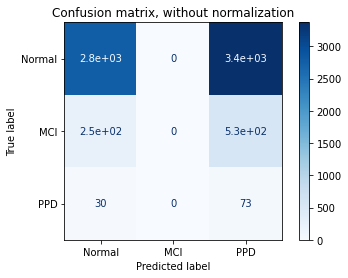

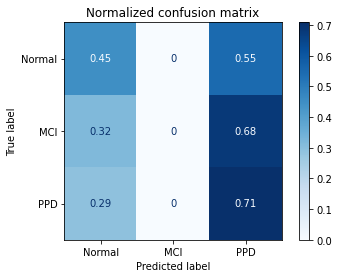

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 


#gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= sexidx & clincogidx
data = np.stack((sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
pr=1;
data=data1[:,:pr].astype(float)
labels=data1[:,pr].astype(float)

param_grid = {'C': [1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.406, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.365, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.599, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.049, total=   1.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.406, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.365, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.484, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.599, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.3s finished


Accuracy and f1-scores are 0.46608695652173915 & 0.2455334151783136
Confusion matrix, without normalization
[[2481 2936    0]
 [  69  199    0]
 [  22   43    0]]
Normalized confusion matrix
[[0.45800258 0.54199742 0.        ]
 [0.25746269 0.74253731 0.        ]
 [0.33846154 0.66153846 0.        ]]


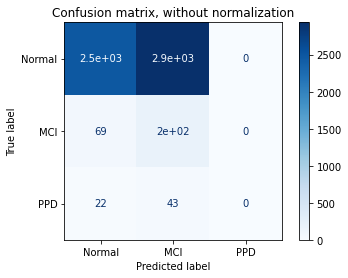

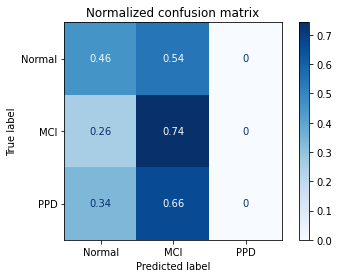

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
#confidence score <2
#gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx


idx= sexidx & clincogidx & clinscoridx1
data = np.stack((sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.111, total=   3.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.873, total=   3.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.555, total=   1.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.524, total=   1.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.505, total=   1.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.608, total=   1.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


Accuracy and f1-scores are 0.16052369432190125 & 0.1468332533765014
Confusion matrix, without normalization
[[ 547 3429 2165]
 [  20  489  274]
 [   0   11   92]]
Normalized confusion matrix
[[0.08907344 0.55837811 0.35254844]
 [0.02554278 0.62452107 0.34993614]
 [0.         0.10679612 0.89320388]]


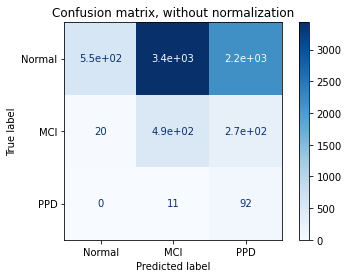

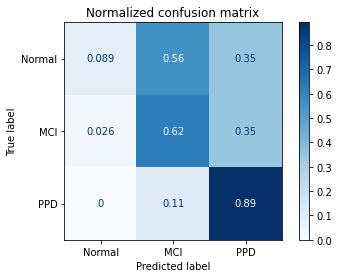

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
#confidence score <2
#gender age educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx


idx= sexidx & bdtidx & educidx & mocadtidx & clincogidx 
data = np.stack((sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.682, total=   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.690, total=   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.716, total=   1.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.759, total=   1.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.753, total=   1.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.606, total=   3.3s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.513, total=   3.7s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.585, total=   3.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.669, total=   2.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


Accuracy and f1-scores are 0.7589565217391304 & 0.4686521799763322
Confusion matrix, without normalization
[[4074  980  363]
 [  19  229   20]
 [   2    2   61]]
Normalized confusion matrix
[[0.7520768  0.18091194 0.06701126]
 [0.07089552 0.85447761 0.07462687]
 [0.03076923 0.03076923 0.93846154]]


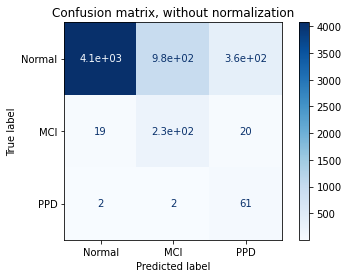

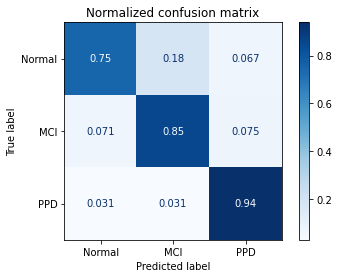

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
#confidence score <2
#gender age educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

#clinscoridx1

idx= sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

param_grid = {'C': [1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.681, total=   1.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.652, total=   1.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.710, total=   1.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.595, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.601, total=   1.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.738, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.745, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.773, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.668, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.3s finished


Accuracy and f1-scores are 0.017142857142857144 & 0.011235955056179775
Confusion matrix, without normalization
[[   0    0 4514]
 [   0    0  646]
 [   0    0   90]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


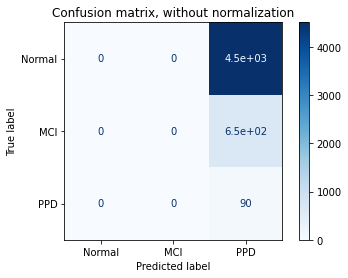

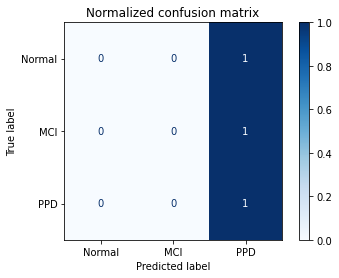

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#gender moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx


idx= mocaidx & sexidx & clincogidx 
data = np.stack((moca[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.731, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.723, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.746, total=   0.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.653, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.695, total=   0.9s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.733, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.723, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.772, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.720, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.1s finished


Accuracy and f1-scores are 0.9367692674779289 & 0.5171195118691423
Confusion matrix, without normalization
[[3886   26   15]
 [ 181   14   17]
 [  21    5   26]]
Normalized confusion matrix
[[0.98955946 0.00662083 0.00381971]
 [0.85377358 0.06603774 0.08018868]
 [0.40384615 0.09615385 0.5       ]]


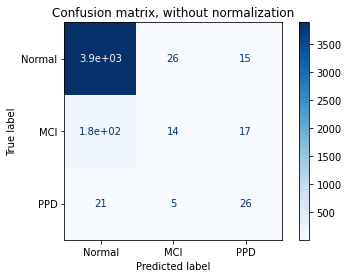

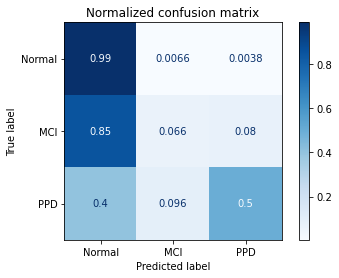

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
#confidence score <2
#gender moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx


idx= mocaidx & sexidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.859, total=   1.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.705, total=   0.6s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.714, total=   0.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.722, total=   0.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.678, total=   0.6s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.6s finished


Accuracy and f1-scores are 0.017142857142857144 & 0.011235955056179775
Confusion matrix, without normalization
[[   0    0 4514]
 [   0    0  646]
 [   0    0   90]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


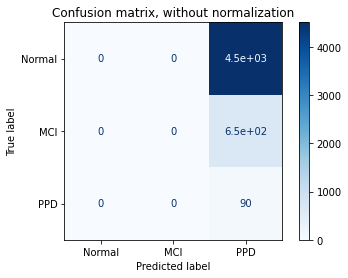

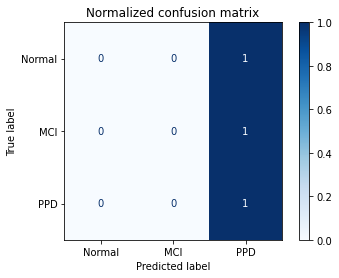

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#gender moca age educperformance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx


idx= mocaidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx 
data = np.stack((moca[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.013, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.938, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.937, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.937, total=   1.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.937, total=   1.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.763, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.773, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.763, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.742, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.9s finished


Accuracy and f1-scores are 0.9393939393939394 & 0.44180408438099006
Confusion matrix, without normalization
[[3924    0    3]
 [ 207    0    5]
 [  39    0   13]]
Normalized confusion matrix
[[9.99236058e-01 0.00000000e+00 7.63941940e-04]
 [9.76415094e-01 0.00000000e+00 2.35849057e-02]
 [7.50000000e-01 0.00000000e+00 2.50000000e-01]]


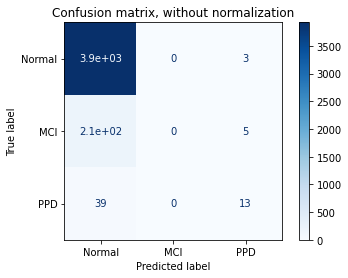

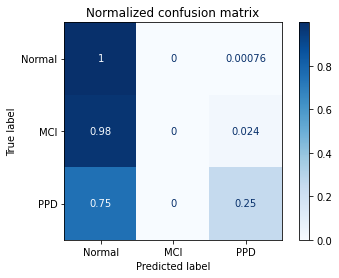

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#gender moca age educperformance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#highest confidence

idx= mocaidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.705, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.745, total=   1.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.781, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.768, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.753, total=   1.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.725, total=   0.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.774, total=   0.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.792, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.777, total=   0.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


Accuracy and f1-scores are 0.8713083178770152 & 0.4261104532850471
Confusion matrix, without normalization
[[6018    5  104]
 [ 536    2  241]
 [  15    1   87]]
Normalized confusion matrix
[[9.82209891e-01 8.16060062e-04 1.69740493e-02]
 [6.88061617e-01 2.56739409e-03 3.09370988e-01]
 [1.45631068e-01 9.70873786e-03 8.44660194e-01]]


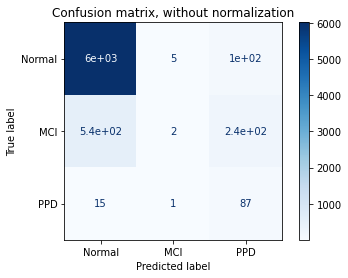

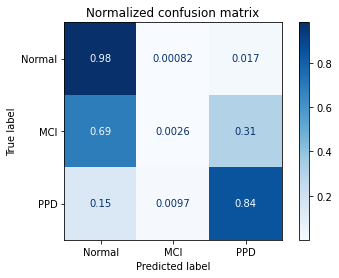

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#gender npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx


idx= npcogidx & sexidx & clincogidx 
data = np.stack((npcog[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.763, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.806, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.827, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.805, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.817, total=   0.8s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.764, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.806, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.833, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.809, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.9s finished


Accuracy and f1-scores are 0.946817785527463 & 0.5800491580900403
Confusion matrix, without normalization
[[5338   30   36]
 [ 186   50   30]
 [  10   13   42]]
Normalized confusion matrix
[[0.98778682 0.00555144 0.00666173]
 [0.69924812 0.18796992 0.11278195]
 [0.15384615 0.2        0.64615385]]


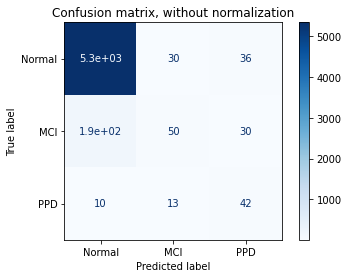

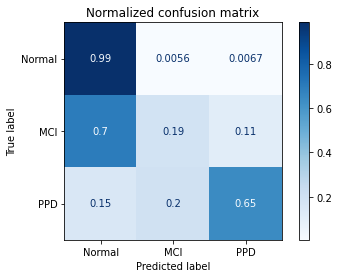

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#gender npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
# highest confidence

idx= npcogidx & sexidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.148, total=   3.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.015, total=   3.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.710, total=   0.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.757, total=   0.9s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.786, total=   0.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.775, total=   0.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Accuracy and f1-scores are 0.7601655014980739 & 0.5435759651424296
Confusion matrix, without normalization
[[4802 1274   51]
 [ 166  441  172]
 [   6   12   85]]
Normalized confusion matrix
[[0.78374408 0.2079321  0.00832381]
 [0.21309371 0.5661104  0.22079589]
 [0.05825243 0.11650485 0.82524272]]


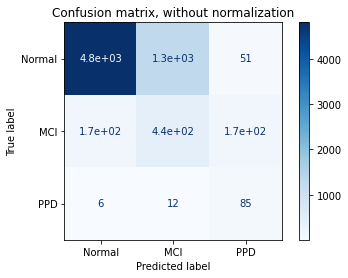

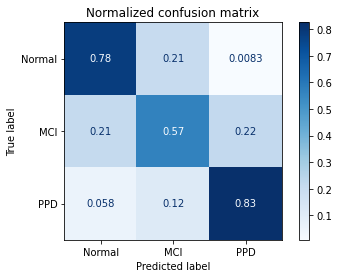

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#gender npcog age educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= npcogidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx 
data = np.stack((npcog[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.846, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.900, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.880, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.885, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.769, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.811, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.830, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.806, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.6s finished


Accuracy and f1-scores are 0.9379250217959896 & 0.7634816939055199
Confusion matrix, without normalization
[[5109  260   35]
 [  56  207    3]
 [   2    0   63]]
Normalized confusion matrix
[[0.94541081 0.04811251 0.00647668]
 [0.21052632 0.77819549 0.0112782 ]
 [0.03076923 0.         0.96923077]]


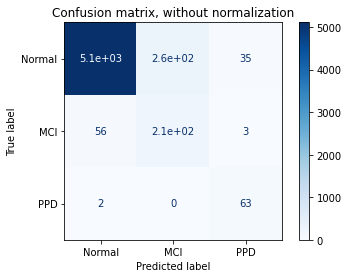

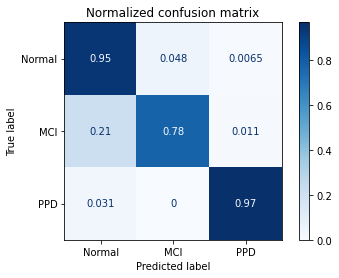

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#gender npcog age educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
# highest confidence

idx= npcogidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.123, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.017, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.017, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.8s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.775, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.804, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.835, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.788, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.8s finished


Accuracy and f1-scores are 0.800801373783629 & 0.6107916689527219
Confusion matrix, without normalization
[[3725  755   28]
 [ 148  401   94]
 [   4   15   71]]
Normalized confusion matrix
[[0.82630878 0.16748004 0.00621118]
 [0.23017107 0.62363919 0.14618974]
 [0.04444444 0.16666667 0.78888889]]


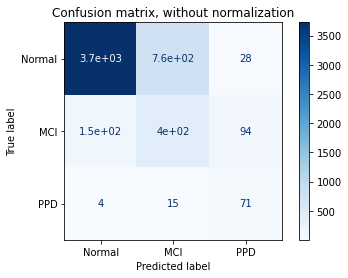

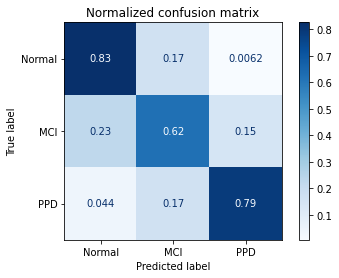

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog moca age educ sexperformance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & npcogidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx 
data = np.stack((moca[idx],npcog[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.928, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.935, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.937, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.935, total=   1.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.843, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.855, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.873, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.814, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.5s finished


Accuracy and f1-scores are 0.9619980879541109 & 0.7951360586386822
Confusion matrix, without normalization
[[3917    4    0]
 [ 153   58    0]
 [   2    0   50]]
Normalized confusion matrix
[[0.99897985 0.00102015 0.        ]
 [0.72511848 0.27488152 0.        ]
 [0.03846154 0.         0.96153846]]


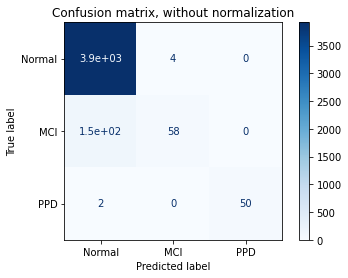

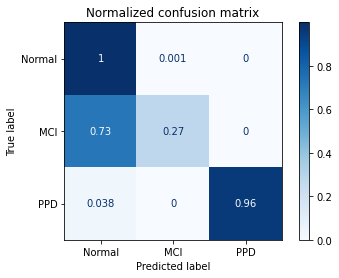

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog moca age educ sexperformance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & npcogidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.737, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.743, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.757, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.704, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.690, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.740, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.651, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.757, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.617, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.1s finished


Accuracy and f1-scores are 0.8556190476190476 & 0.45107319995181316
Confusion matrix, without normalization
[[4420   36   58]
 [ 551   25   70]
 [  37    6   47]]
Normalized confusion matrix
[[0.9791759  0.00797519 0.01284891]
 [0.85294118 0.03869969 0.10835913]
 [0.41111111 0.06666667 0.52222222]]


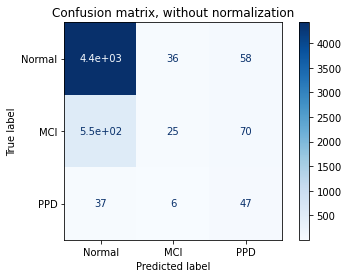

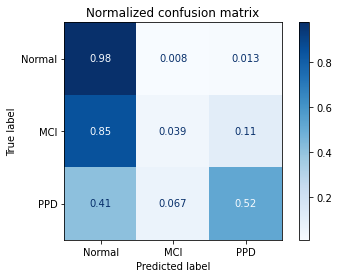

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 


#moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & clincogidx
data = np.stack((moca[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
pr=1;
data=data1[:,:pr].astype(float)
labels=data1[:,pr].astype(float)

param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
from collections import Counter
#moca levels
len(labels)


5250

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.797, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.801, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.717, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.751, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.752, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.797, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.801, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.798, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.758, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.5s finished


Accuracy and f1-scores are 0.9343832020997376 & 0.5217689956663021
Confusion matrix, without normalization
[[3873   39   15]
 [ 178   17   17]
 [  20    6   26]]
Normalized confusion matrix
[[0.98624905 0.00993125 0.00381971]
 [0.83962264 0.08018868 0.08018868]
 [0.38461538 0.11538462 0.5       ]]


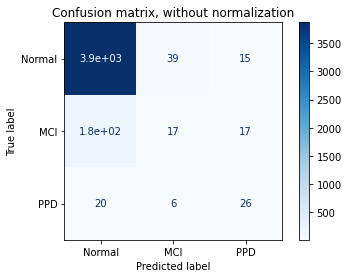

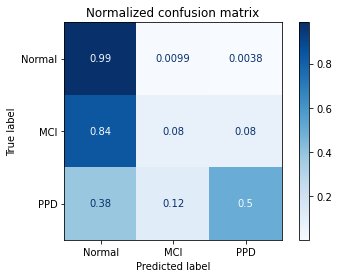

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
#confidence score <2
#moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx


idx= mocaidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca
len(labels)

4191

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.705, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.745, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.781, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.768, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.753, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.705, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.774, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.781, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.781, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.0s finished


Accuracy and f1-scores are 0.8711656441717791 & 0.42404678435864135
Confusion matrix, without normalization
[[6018    0  109]
 [ 536    0  243]
 [  15    0   88]]
Normalized confusion matrix
[[0.98220989 0.         0.01779011]
 [0.68806162 0.         0.31193838]
 [0.14563107 0.         0.85436893]]


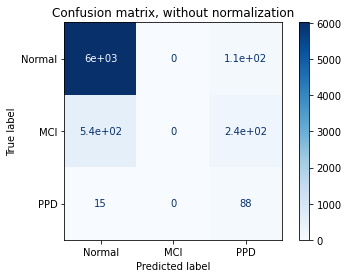

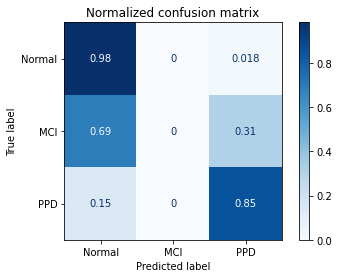

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#np1cog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & clincogidx
data = np.stack((npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog levels
len(labels)

7009

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.763, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.806, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.827, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.805, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.813, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.763, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.806, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.827, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.805, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.7s finished


Accuracy and f1-scores are 0.8099389712292938 & 0.5715836500426047
Confusion matrix, without normalization
[[4419  974   11]
 [  58  189   19]
 [   3   25   37]]
Normalized confusion matrix
[[0.81772761 0.18023686 0.00203553]
 [0.21804511 0.71052632 0.07142857]
 [0.04615385 0.38461538 0.56923077]]


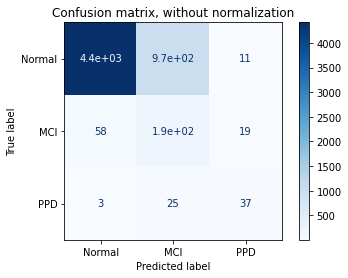

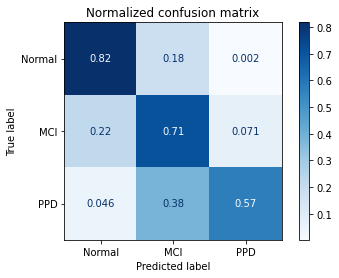

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#np1cog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog
len(labels)

5735

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.726, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.638, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.696, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.615, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.726, total=   1.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.738, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.659, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.673, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.601, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.4s finished


Accuracy and f1-scores are 0.6759514170040486 & 0.4259769981654209
Confusion matrix, without normalization
[[3826 1334  220]
 [ 239  286  189]
 [   2   17   62]]
Normalized confusion matrix
[[0.71115242 0.24795539 0.04089219]
 [0.33473389 0.40056022 0.26470588]
 [0.02469136 0.20987654 0.7654321 ]]


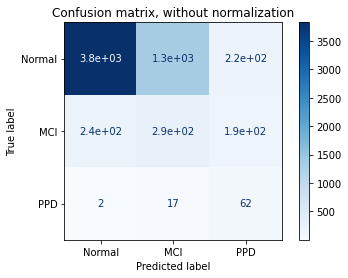

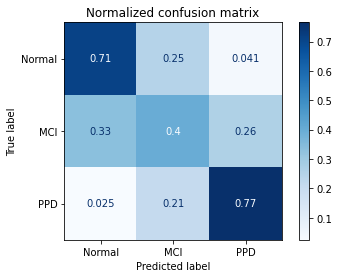

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#symbol digit performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= symdigidx & clincogidx
data = np.stack((symdig[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)
#predictive power of moca alone
#data = moca[idx].to_numpy().reshape(-1, 1)

#labels = clincog[idx].to_numpy()
#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#symbol digit
len(labels)

6175

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.629, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.494, total=   1.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.476, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.360, total=   1.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.427, total=   1.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.805, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.716, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.697, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.681, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.0s finished


Accuracy and f1-scores are 0.7534986005597761 & 0.4312608781420473
Confusion matrix, without normalization
[[3626  976  114]
 [  72  109   59]
 [   3    9   34]]
Normalized confusion matrix
[[0.76887193 0.20695505 0.02417303]
 [0.3        0.45416667 0.24583333]
 [0.06521739 0.19565217 0.73913043]]


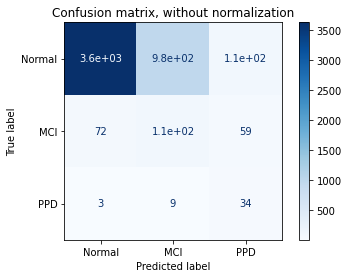

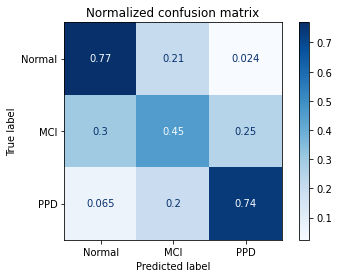

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#symbol digit performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= symdigidx & clincogidx & clinscoridx1
data = np.stack((symdig[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)
#predictive power of moca alone
#data = moca[idx].to_numpy().reshape(-1, 1)

#labels = clincog[idx].to_numpy()
#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#sym_dig
len(labels)

5002

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.309, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.478, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.418, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.386, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.687, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.519, total=   1.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.540, total=   1.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.604, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


Accuracy and f1-scores are 0.642237085527252 & 0.33438862587306656
Confusion matrix, without normalization
[[4316 1343  482]
 [ 497  171  115]
 [  58   19   26]]
Normalized confusion matrix
[[0.70281713 0.21869402 0.07848885]
 [0.63473819 0.2183908  0.14687101]
 [0.5631068  0.18446602 0.25242718]]


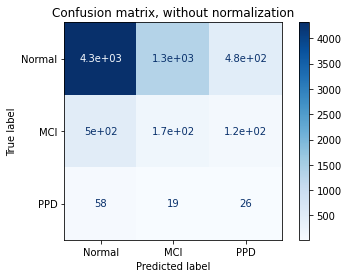

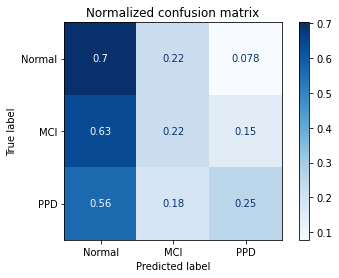

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= educidx & clincogidx
data = np.stack((educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#education levels
len(labels)

7027

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.350, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.130, total=   1.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.197, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.231, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.326, total=   1.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.733, total=   1.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.543, total=   0.9s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.533, total=   0.9s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.650, total=   1.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


Accuracy and f1-scores are 0.6791304347826087 & 0.3214875124181003
Confusion matrix, without normalization
[[3822 1176  419]
 [ 170   64   34]
 [  34   12   19]]
Normalized confusion matrix
[[0.70555658 0.21709433 0.07734909]
 [0.63432836 0.23880597 0.12686567]
 [0.52307692 0.18461538 0.29230769]]


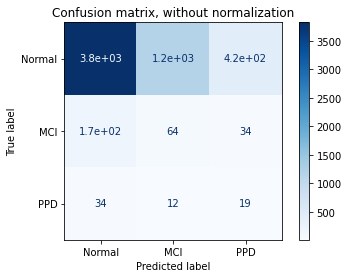

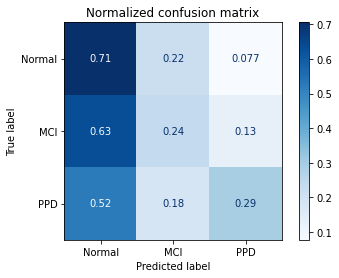

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= educidx & clincogidx & clinscoridx1
data = np.stack((educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#educ
len(labels)

5750

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.595, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.574, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.596, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.597, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.470, total=   2.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.521, total=   2.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.508, total=   2.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.543, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.596, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


Accuracy and f1-scores are 0.6193254589440729 & 0.37260013800776
Confusion matrix, without normalization
[[3912 1876  353]
 [ 263  411  109]
 [  26   48   29]]
Normalized confusion matrix
[[0.6370298  0.30548771 0.05748249]
 [0.33588761 0.52490421 0.13920817]
 [0.25242718 0.46601942 0.2815534 ]]


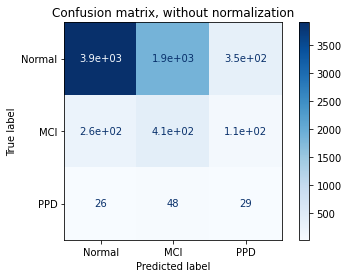

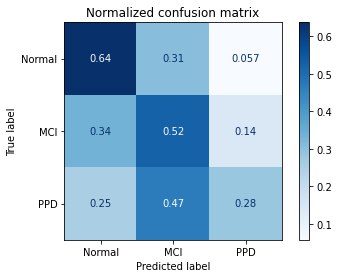

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#age performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= bdtidx & mocadtidx & clincogidx
data = np.stack((age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#age performance
len(labels)

7027

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.492, total=   1.4s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.377, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.443, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.497, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.482, total=   1.3s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.575, total=   2.6s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.575, total=   2.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.558, total=   2.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.604, total=   1.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


Accuracy and f1-scores are 0.6064347826086957 & 0.3146719187938311
Confusion matrix, without normalization
[[3345 1545  527]
 [  77  119   72]
 [  16   26   23]]
Normalized confusion matrix
[[0.61750046 0.28521322 0.09728632]
 [0.28731343 0.44402985 0.26865672]
 [0.24615385 0.4        0.35384615]]


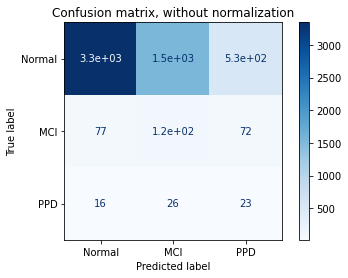

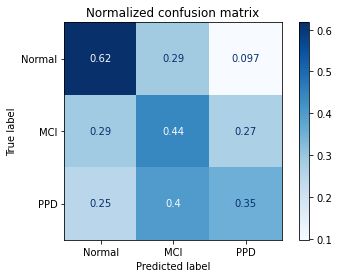

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#age performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#age
len(labels)

5750

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.612, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.570, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   2.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.540, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.540, total=   2.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.524, total=   2.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.574, total=   2.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


Accuracy and f1-scores are 0.655187135335136 & 0.4378837012967711
Confusion matrix, without normalization
[[4036 1416  689]
 [ 213  481   89]
 [   3   13   87]]
Normalized confusion matrix
[[0.65722195 0.23058134 0.11219671]
 [0.27203065 0.61430396 0.11366539]
 [0.02912621 0.12621359 0.84466019]]


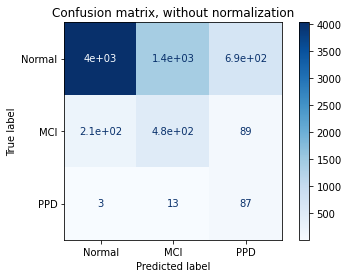

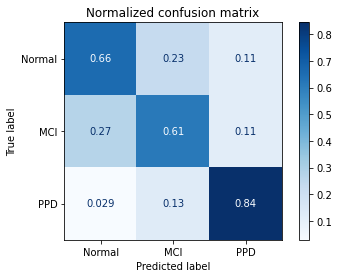

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= educidx & bdtidx & mocadtidx & clincogidx
data = np.stack((age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# age & education
len(labels)

7027

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.632, total=   1.0s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.622, total=   1.0s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.670, total=   1.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.650, total=   1.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.662, total=   1.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.570, total=   4.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.535, total=   4.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.549, total=   3.6s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.603, total=   2.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


Accuracy and f1-scores are 0.6791304347826087 & 0.4065568115687764
Confusion matrix, without normalization
[[3631 1227  559]
 [  33  214   21]
 [   1    4   60]]
Normalized confusion matrix
[[0.67029721 0.22650914 0.10319365]
 [0.12313433 0.79850746 0.07835821]
 [0.01538462 0.06153846 0.92307692]]


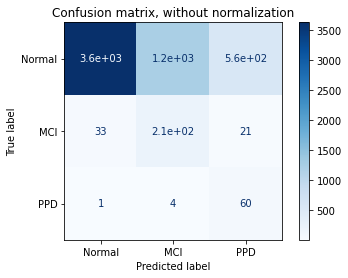

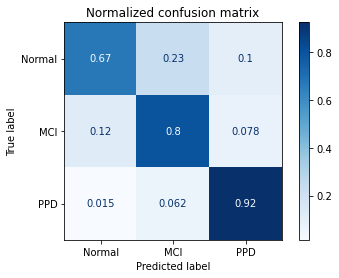

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= educidx & bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#age and educ
len(labels)

5750

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.001, gamma=1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.017, total=   1.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.861, total=   1.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.861, total=   1.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.123, total=   1.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.123, total=   1.6s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.804, total=   0.4s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.811, total=   0.4s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.818, total=   0.4s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.778, total=   0.4s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.9s finished


Accuracy and f1-scores are 0.7998473573745468 & 0.5826316066913829
Confusion matrix, without normalization
[[3767  697   44]
 [ 173  354  116]
 [   3   16   71]]
Normalized confusion matrix
[[0.83562555 0.15461402 0.00976043]
 [0.26905132 0.55054432 0.18040435]
 [0.03333333 0.17777778 0.78888889]]


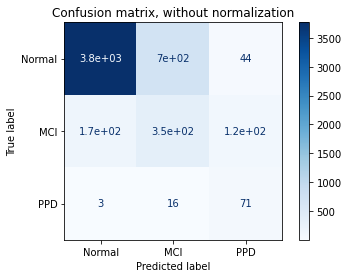

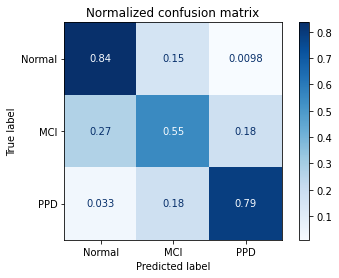

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & npcogidx & clincogidx
data = np.stack((moca[idx],npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.001],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# moca & npcog
len(labels)

5241

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.730, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.728, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.750, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.731, total=   0.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.719, total=   0.8s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.791, total=   0.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.855, total=   0.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.866, total=   0.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.795, total=   0.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.4s finished


Accuracy and f1-scores are 0.8496653919694073 & 0.6143054323178547
Confusion matrix, without normalization
[[3380  529   12]
 [  48  132   31]
 [   1    8   43]]
Normalized confusion matrix
[[0.86202499 0.13491456 0.00306044]
 [0.22748815 0.62559242 0.14691943]
 [0.01923077 0.15384615 0.82692308]]


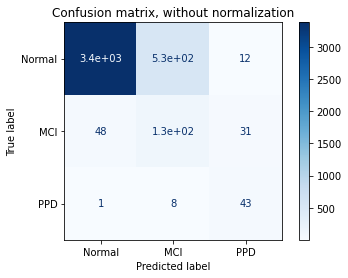

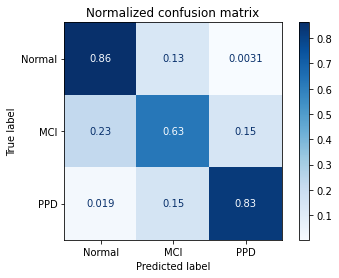

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & npcogidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca,npcog
len(labels)

4184

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.684, total=   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.683, total=   0.8s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.740, total=   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.651, total=   0.8s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.711, total=   0.8s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.747, total=   2.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.736, total=   1.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.760, total=   2.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.652, total=   2.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


Accuracy and f1-scores are 0.7331417624521073 & 0.4828699911636772
Confusion matrix, without normalization
[[3476  899  128]
 [ 203  294  142]
 [   2   19   57]]
Normalized confusion matrix
[[0.77192982 0.19964468 0.02842549]
 [0.31768388 0.4600939  0.22222222]
 [0.02564103 0.24358974 0.73076923]]


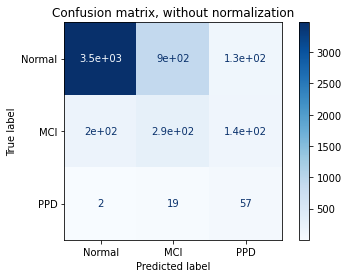

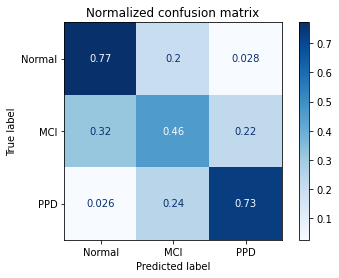

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & symbol digit
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & clincogidx
data = np.stack((moca[idx],symdig[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca,symbol_digit
len(labels)

5220

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.773, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.790, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.760, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.764, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.812, total=   0.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.800, total=   1.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.808, total=   1.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.793, total=   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.723, total=   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.9s finished


Accuracy and f1-scores are 0.7860911270983213 & 0.5014050601947058
Confusion matrix, without normalization
[[3119  743   56]
 [  44  125   40]
 [   0    9   34]]
Normalized confusion matrix
[[0.79606942 0.18963757 0.01429301]
 [0.21052632 0.59808612 0.19138756]
 [0.         0.20930233 0.79069767]]


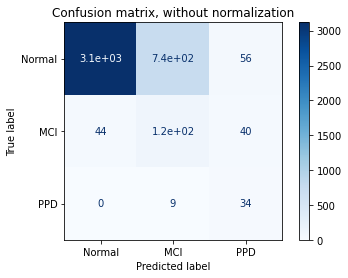

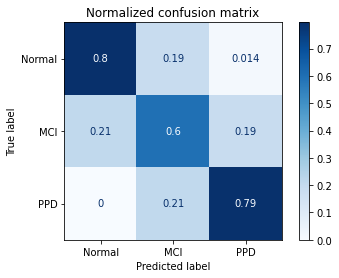

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & symbol digit
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],symdig[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca,symbol digit
len(labels)

4170

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.123, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.123, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.122, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.123, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.123, total=   1.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.736, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.721, total=   1.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.739, total=   1.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.666, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.8s finished


Accuracy and f1-scores are 0.7241379310344828 & 0.4818131919384079
Confusion matrix, without normalization
[[3408  964  131]
 [ 180  315  144]
 [   1   20   57]]
Normalized confusion matrix
[[0.75682878 0.2140795  0.02909172]
 [0.28169014 0.49295775 0.22535211]
 [0.01282051 0.25641026 0.73076923]]


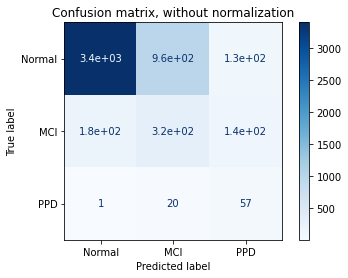

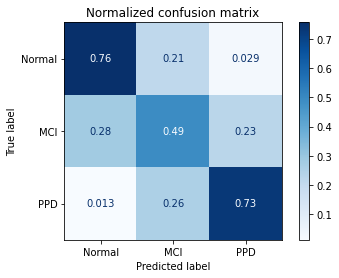

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & symbol digit & age & education
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],symdig[idx],educ[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca,symbol digit,age and education
len(labels)

5220

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.940, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.940, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.940, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.062, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.245, total=   1.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.788, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.808, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.773, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.730, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.0s finished


Accuracy and f1-scores are 0.9095923261390887 & 0.7453940871085066
Confusion matrix, without normalization
[[3585  317   16]
 [  40  167    2]
 [   2    0   41]]
Normalized confusion matrix
[[0.91500766 0.08090863 0.00408372]
 [0.19138756 0.79904306 0.00956938]
 [0.04651163 0.         0.95348837]]


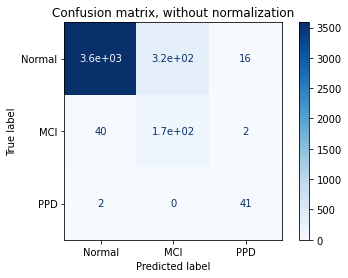

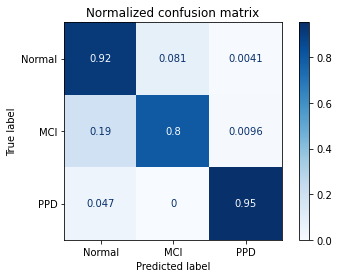

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & symbol digit & age & education
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],symdig[idx],educ[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca,sym_digit,age,educ
len(labels)

4170

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.714, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.669, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.628, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.736, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.687, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.758, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.669, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.4s finished


Accuracy and f1-scores are 0.8521904761904762 & 0.4648813309763307
Confusion matrix, without normalization
[[4380   78   56]
 [ 528   50   68]
 [  33   13   44]]
Normalized confusion matrix
[[0.97031458 0.01727957 0.01240585]
 [0.81733746 0.07739938 0.10526316]
 [0.36666667 0.14444444 0.48888889]]


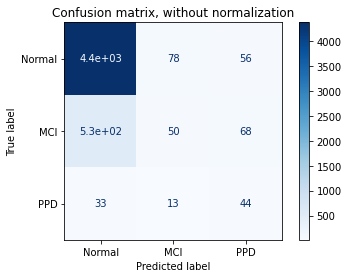

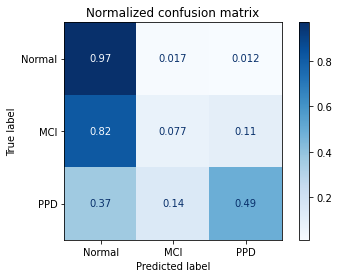

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & educidx & clincogidx
data = np.stack((moca[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# moca, educ 
len(labels)

5250

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.800, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.758, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.766, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.727, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.727, total=   0.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.797, total=   0.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.801, total=   0.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.797, total=   0.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.732, total=   0.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.4s finished


Accuracy and f1-scores are 0.7845382963493199 & 0.5034867020508004
Confusion matrix, without normalization
[[3134  744   49]
 [  64  121   27]
 [   0   19   33]]
Normalized confusion matrix
[[0.79806468 0.1894576  0.01247772]
 [0.30188679 0.57075472 0.12735849]
 [0.         0.36538462 0.63461538]]


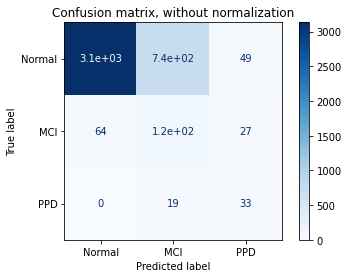

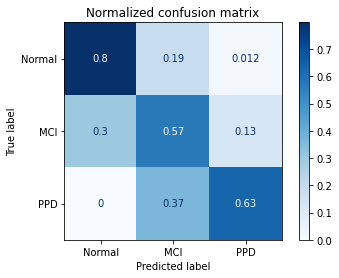

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & educidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca,education
len(labels)

4191

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.696, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.646, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.678, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.641, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.639, total=   1.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.702, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.729, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.736, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.674, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.4s finished


Accuracy and f1-scores are 0.7034285714285714 & 0.46965772807096434
Confusion matrix, without normalization
[[3337 1023  154]
 [ 208  290  148]
 [   3   21   66]]
Normalized confusion matrix
[[0.73925565 0.22662827 0.03411608]
 [0.32198142 0.44891641 0.22910217]
 [0.03333333 0.23333333 0.73333333]]


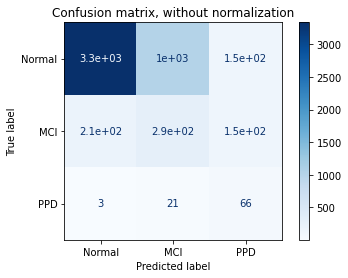

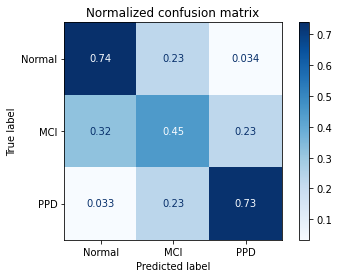

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & age performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & bdtidx & mocadtidx & clincogidx
data = np.stack((moca[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca, age 
len(labels)

5250

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.734, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.760, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.715, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.696, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.699, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.766, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.773, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.771, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.728, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   25.2s finished


Accuracy and f1-scores are 0.7585301837270341 & 0.4777271243378464
Confusion matrix, without normalization
[[3026  844   57]
 [  55  120   37]
 [   1   18   33]]
Normalized confusion matrix
[[0.77056277 0.21492233 0.0145149 ]
 [0.25943396 0.56603774 0.1745283 ]
 [0.01923077 0.34615385 0.63461538]]


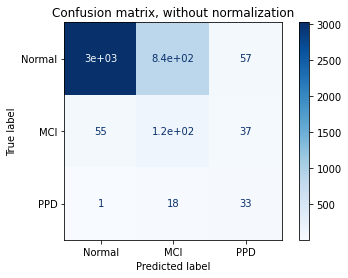

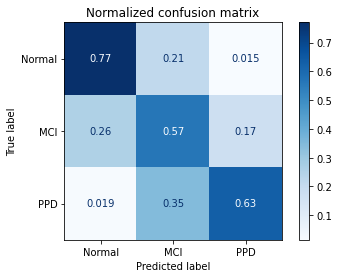

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & age performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca,age
len(labels)

4191

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.714, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.753, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.772, total=   1.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.705, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.750, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.788, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.770, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.2s finished


Accuracy and f1-scores are 0.7604508489085462 & 0.5434206536026523
Confusion matrix, without normalization
[[4769 1290   68]
 [ 178  494  107]
 [   6   30   67]]
Normalized confusion matrix
[[0.77835809 0.2105435  0.01109842]
 [0.22849807 0.63414634 0.13735558]
 [0.05825243 0.29126214 0.65048544]]


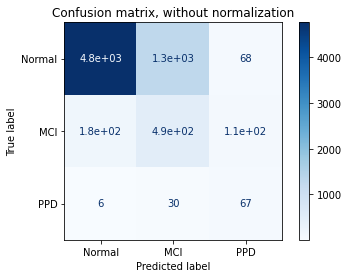

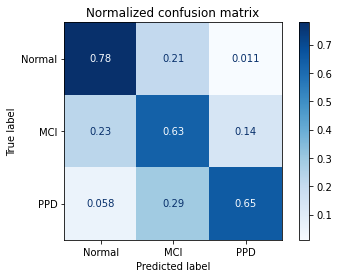

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & educidx & clincogidx
data = np.stack((npcog[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog, educ
len(labels)

7009

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.779, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.772, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.827, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.793, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.829, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.766, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.812, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.829, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.806, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.6s finished


Accuracy and f1-scores are 0.806974716652136 & 0.5220501173358856
Confusion matrix, without normalization
[[4411  918   75]
 [  64  171   31]
 [   3   16   46]]
Normalized confusion matrix
[[0.81624722 0.16987417 0.01387861]
 [0.2406015  0.64285714 0.11654135]
 [0.04615385 0.24615385 0.70769231]]


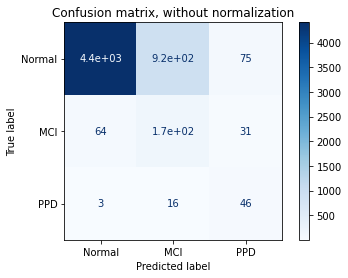

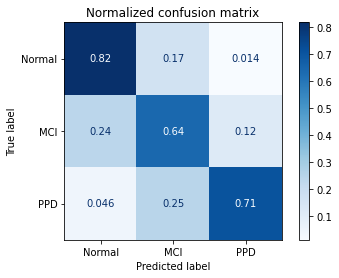

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & educidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,educ
len(labels)

5735

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.596, total=   3.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.767, total=   3.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.766, total=   3.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.832, total=   3.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.762, total=   3.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.731, total=   0.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.756, total=   0.6s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.785, total=   0.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.781, total=   0.6s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Accuracy and f1-scores are 0.7568840062776431 & 0.5284773100824818
Confusion matrix, without normalization
[[4802 1260   65]
 [ 166  417  196]
 [   6   11   86]]
Normalized confusion matrix
[[0.78374408 0.20564714 0.01060878]
 [0.21309371 0.53530167 0.25160462]
 [0.05825243 0.10679612 0.83495146]]


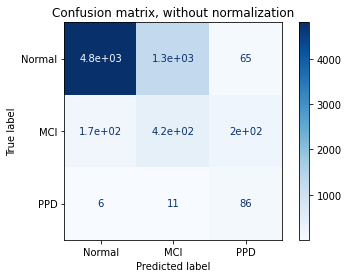

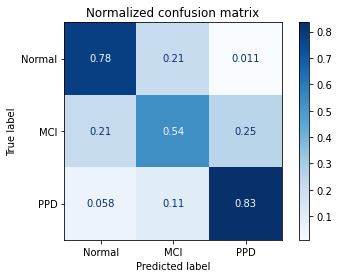

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & age performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & bdtidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [ 0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog, age
len(labels)

7009

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.783, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.765, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.827, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.825, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.807, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.769, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.806, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.833, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.809, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.3s finished


Accuracy and f1-scores are 0.805231037489102 & 0.5299449605509584
Confusion matrix, without normalization
[[4419  954   31]
 [  58  151   57]
 [   3   14   48]]
Normalized confusion matrix
[[0.81772761 0.1765359  0.00573649]
 [0.21804511 0.56766917 0.21428571]
 [0.04615385 0.21538462 0.73846154]]


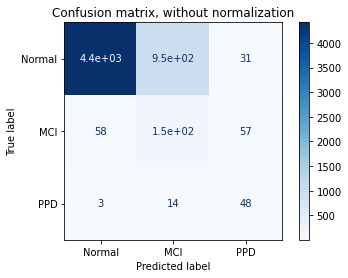

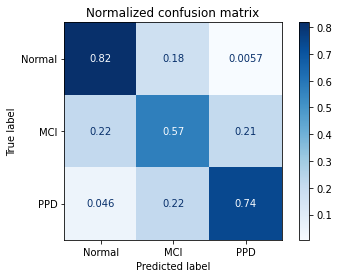

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & age performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,age
len(labels)

5735

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.751, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.744, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.777, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.746, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.778, total=   1.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.733, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.746, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.780, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.765, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.7s finished


Accuracy and f1-scores are 0.7771827328789354 & 0.5989412969995628
Confusion matrix, without normalization
[[4220 1097   52]
 [ 135  499   78]
 [   3    8   70]]
Normalized confusion matrix
[[0.78599367 0.2043211  0.00968523]
 [0.18960674 0.7008427  0.10955056]
 [0.03703704 0.09876543 0.86419753]]


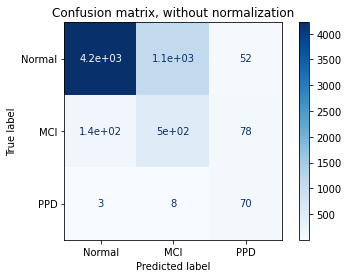

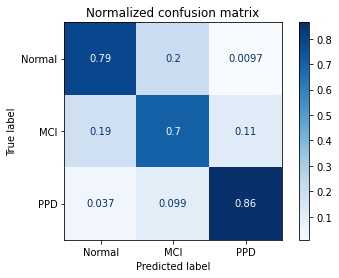

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & symbol digit performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & clincogidx
data = np.stack((npcog[idx],symdig[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,symbol digit
len(labels)

6162

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.294, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.921, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.918, total=   1.6s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.913, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.926, total=   1.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.852, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.836, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.861, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.803, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.3s finished


Accuracy and f1-scores are 0.8433179723502304 & 0.5687093255763762
Confusion matrix, without normalization
[[4029  654   23]
 [  57  142   40]
 [   2    6   38]]
Normalized confusion matrix
[[0.8561411  0.13897153 0.00488738]
 [0.23849372 0.59414226 0.16736402]
 [0.04347826 0.13043478 0.82608696]]


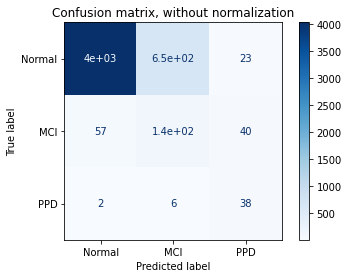

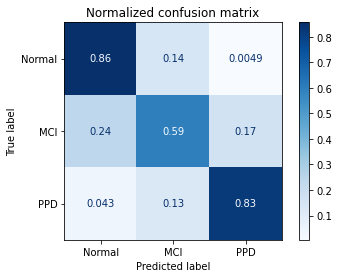

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & symbol digit performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],symdig[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,symbol digit
len(labels)

4991

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.821, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.820, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.836, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.805, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.827, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.711, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.728, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.732, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.669, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.6s finished


Accuracy and f1-scores are 0.8859047619047619 & 0.7609376382151317
Confusion matrix, without normalization
[[4279  211   24]
 [ 357  284    5]
 [   1    1   88]]
Normalized confusion matrix
[[0.94793974 0.04674346 0.00531679]
 [0.55263158 0.43962848 0.00773994]
 [0.01111111 0.01111111 0.97777778]]


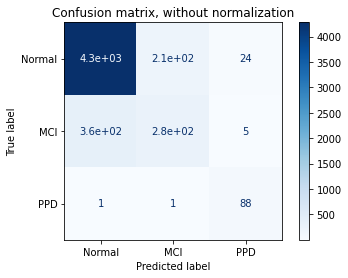

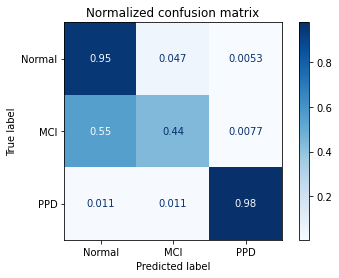

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & educidx & bdtidx & mocadtidx & clincogidx
data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca, age, educ
len(labels)

5250

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.905, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.914, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.897, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.897, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.764, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.782, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.768, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.730, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.3s finished


Accuracy and f1-scores are 0.9620615604867573 & 0.8368740763955277
Confusion matrix, without normalization
[[3849   66   12]
 [  80  132    0]
 [   1    0   51]]
Normalized confusion matrix
[[0.98013751 0.01680672 0.00305577]
 [0.37735849 0.62264151 0.        ]
 [0.01923077 0.         0.98076923]]


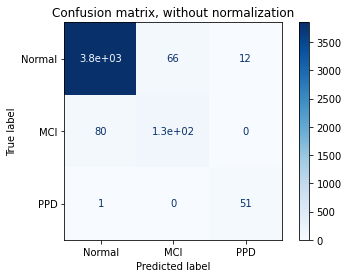

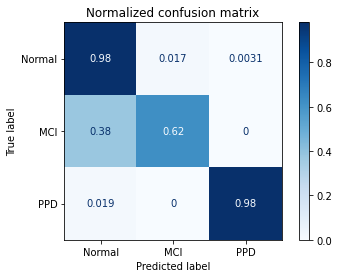

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#moca & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & educidx & bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [ 0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca,age,education
len(labels)

4191

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.123, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.119, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.017, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.8s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.8s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.779, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.801, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.838, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.784, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.4s finished


Accuracy and f1-scores are 0.8025186033199772 & 0.6128157869051875
Confusion matrix, without normalization
[[3731  748   29]
 [ 143  402   98]
 [   4   13   73]]
Normalized confusion matrix
[[0.82763975 0.16592724 0.00643301]
 [0.22239502 0.6251944  0.15241058]
 [0.04444444 0.14444444 0.81111111]]


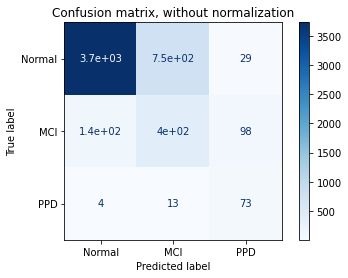

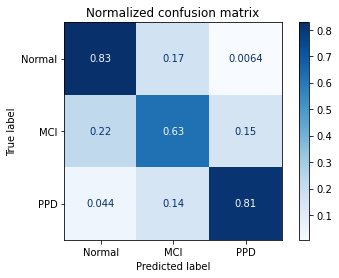

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & moca & age performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & bdtidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],moca[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [ 0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,moca,age
len(labels)

5241

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.050, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.050, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.050, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.050, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.938, total=   1.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.834, total=   0.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.854, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.854, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.814, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.1s finished


Accuracy and f1-scores are 0.84631931166348 & 0.614955839461536
Confusion matrix, without normalization
[[3360  548   13]
 [  42  137   32]
 [   0    8   44]]
Normalized confusion matrix
[[0.85692425 0.13976027 0.00331548]
 [0.19905213 0.6492891  0.15165877]
 [0.         0.15384615 0.84615385]]


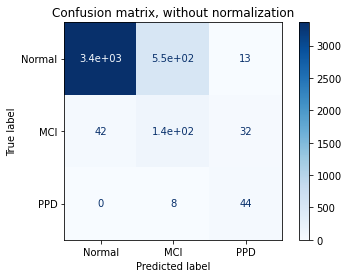

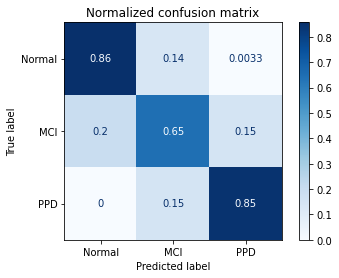

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & moca & age performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],moca[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [ 0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,moca,age
len(labels)

4184

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.687, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.733, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.615, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.724, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.739, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.798, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.747, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.9s finished


Accuracy and f1-scores are 0.8551803091013166 & 0.4910372691385478
Confusion matrix, without normalization
[[4363  100   45]
 [ 507   75   61]
 [  22   24   44]]
Normalized confusion matrix
[[0.96783496 0.02218279 0.00998225]
 [0.78849145 0.11664075 0.09486781]
 [0.24444444 0.26666667 0.48888889]]


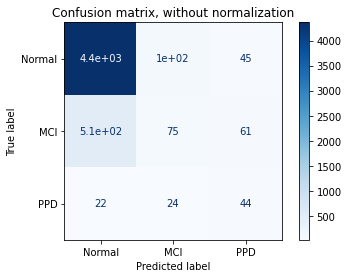

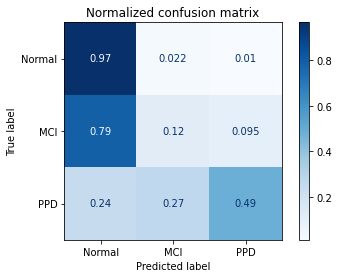

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & moca & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & educidx & clincogidx
data = np.stack((npcog[idx],moca[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,moca,education
len(labels)

5241

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.302, total=   1.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.406, total=   1.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.243, total=   1.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.191, total=   1.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.922, total=   1.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.835, total=   0.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.846, total=   0.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.876, total=   0.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.824, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.8s finished


Accuracy and f1-scores are 0.8398661567877629 & 0.6087371774717449
Confusion matrix, without normalization
[[3340  570   11]
 [  49  131   31]
 [   1    8   43]]
Normalized confusion matrix
[[0.85182351 0.14537108 0.00280541]
 [0.23222749 0.62085308 0.14691943]
 [0.01923077 0.15384615 0.82692308]]


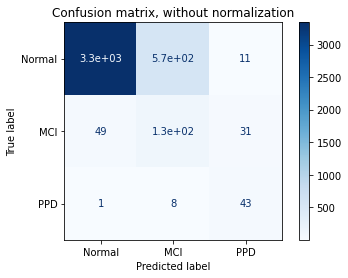

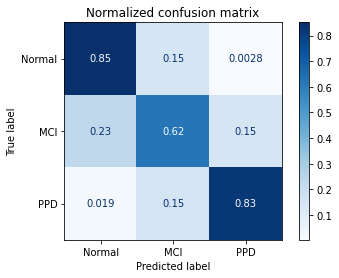

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & moca & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & educidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],moca[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,moca,education
len(labels)

4184

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.258, total=   3.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.015, total=   3.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.874, total=   3.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.708, total=   0.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.747, total=   0.8s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.787, total=   0.6s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.775, total=   0.6s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Accuracy and f1-scores are 0.7584534170352404 & 0.5341288997703999
Confusion matrix, without normalization
[[4802 1260   65]
 [ 166  428  185]
 [   6   11   86]]
Normalized confusion matrix
[[0.78374408 0.20564714 0.01060878]
 [0.21309371 0.54942234 0.23748395]
 [0.05825243 0.10679612 0.83495146]]


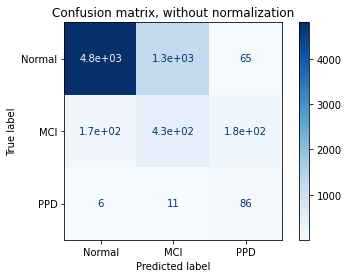

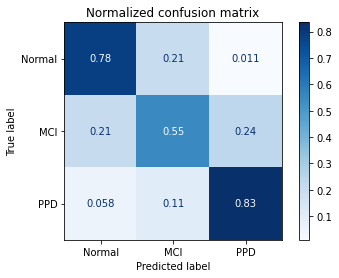

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & educidx & bdtidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog, age, educ
len(labels)

7009

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.828, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.772, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.853, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.857, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.857, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.767, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.811, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.829, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.806, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.3s finished


Accuracy and f1-scores are 0.9105492589363557 & 0.684436978248559
Confusion matrix, without normalization
[[4956  380   68]
 [  57  203    6]
 [   2    0   63]]
Normalized confusion matrix
[[0.91709845 0.07031828 0.01258327]
 [0.21428571 0.76315789 0.02255639]
 [0.03076923 0.         0.96923077]]


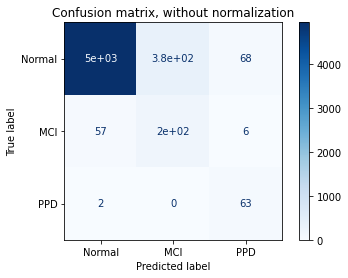

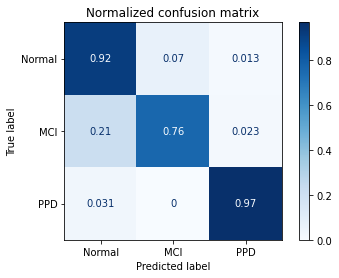

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & educidx & bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,age,education
len(labels)

5735

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.870, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.871, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.871, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.871, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.871, total=   2.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.728, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.747, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.779, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.767, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


Accuracy and f1-scores are 0.9668938656280428 & 0.9361490932751725
Confusion matrix, without normalization
[[5304   61    4]
 [ 139  573    0]
 [   0    0   81]]
Normalized confusion matrix
[[9.87893462e-01 1.13615198e-02 7.45017694e-04]
 [1.95224719e-01 8.04775281e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


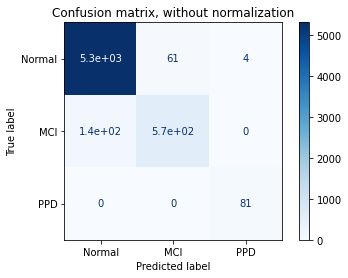

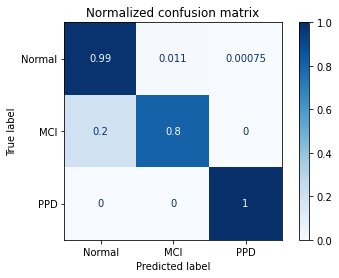

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & symbol digit & age & education
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],symdig[idx],educ[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,symbol digit,age,education
len(labels)

6162

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.943, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.009, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.009, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.009, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.009, total=   1.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.837, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.804, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.858, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.830, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.7s finished


Accuracy and f1-scores are 0.8465237427369264 & 0.5714966937446385
Confusion matrix, without normalization
[[4041  641   24]
 [  53  146   40]
 [   1    7   38]]
Normalized confusion matrix
[[0.85869103 0.13620909 0.00509987]
 [0.22175732 0.61087866 0.16736402]
 [0.02173913 0.15217391 0.82608696]]


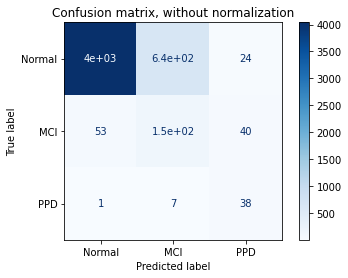

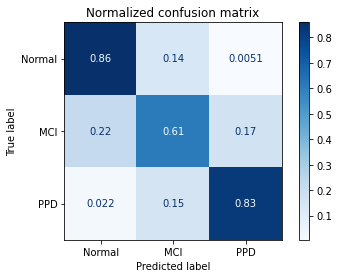

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & symbol digit & age & education
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],symdig[idx],educ[idx],age[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,sym digit,age,education
len(labels)

4991

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.123, total=   1.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.017, total=   1.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.017, total=   1.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.9s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.860, total=   1.9s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.780, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.803, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.838, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.782, total=   0.3s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.7s finished


Accuracy and f1-scores are 0.8004197672199962 & 0.6058414863883991
Confusion matrix, without normalization
[[3723  754   31]
 [ 142  401  100]
 [   4   15   71]]
Normalized confusion matrix
[[0.82586513 0.16725821 0.00687666]
 [0.22083981 0.62363919 0.155521  ]
 [0.04444444 0.16666667 0.78888889]]


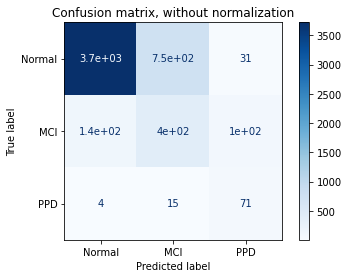

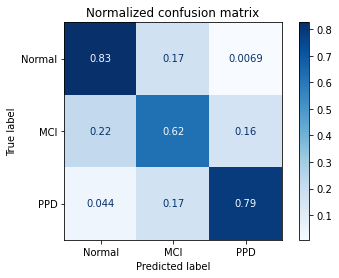

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & moca age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & educidx & bdtidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog, moca, age,educ
len(labels)

5241

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.050, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.051, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.050, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.050, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.938, total=   1.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.840, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.853, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.859, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.817, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.4s finished


Accuracy and f1-scores are 0.8458413001912046 & 0.614300837160321
Confusion matrix, without normalization
[[3359  551   11]
 [  43  138   30]
 [   0   10   42]]
Normalized confusion matrix
[[0.85666922 0.14052538 0.00280541]
 [0.20379147 0.65402844 0.14218009]
 [0.         0.19230769 0.80769231]]


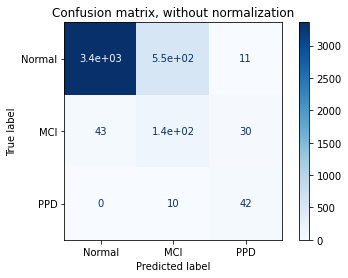

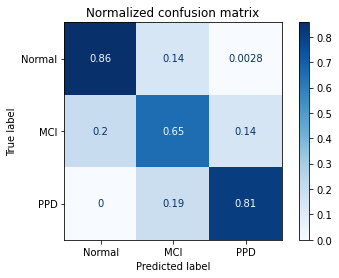

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & moca age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & educidx & bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,moca,age,education
len(labels)

4184

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.863, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.863, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.123, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.123, total=   1.7s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.863, total=   1.7s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.775, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.792, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.836, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.774, total=   0.4s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.4s finished


Accuracy and f1-scores are 0.8035303146584805 & 0.5911817210464333
Confusion matrix, without normalization
[[3741  729   27]
 [ 140  385  112]
 [   2   14   62]]
Normalized confusion matrix
[[0.83188793 0.16210807 0.006004  ]
 [0.21978022 0.6043956  0.17582418]
 [0.02564103 0.17948718 0.79487179]]


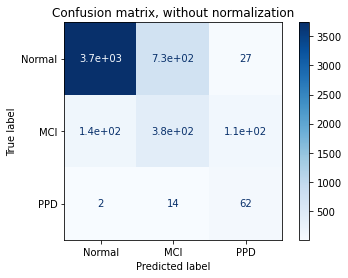

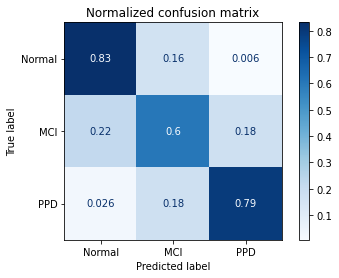

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & moca & symdig & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & mocaidx & educidx & bdtidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog,moca,sym_digit.age,education
len(labels)

5212

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.940, total=   1.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.940, total=   1.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.939, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.010, total=   1.2s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.010, total=   1.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.852, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.858, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.855, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.814, total=   0.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.0s finished


Accuracy and f1-scores are 0.8498678837376892 & 0.597614494125732
Confusion matrix, without normalization
[[3366  533   13]
 [  39  138   31]
 [   0    9   34]]
Normalized confusion matrix
[[0.86042945 0.13624744 0.00332311]
 [0.1875     0.66346154 0.14903846]
 [0.         0.20930233 0.79069767]]


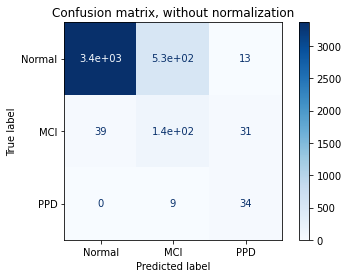

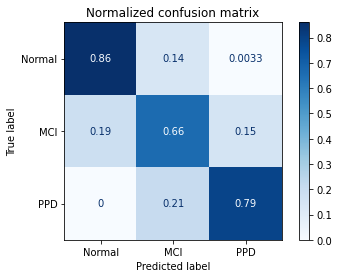

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 

#npcog & moca & symdig & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & mocaidx & educidx & bdtidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

#clf = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
# defining parameter range 
param_grid = {'C': [0.01],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3) 
grid.fit(data, labels)
model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
model.fit(data, labels)

out = model.predict(data)
acc1 = sum(out==labels)/len(labels)
f11 = f1_score(labels, out, average='macro')
print ('Accuracy and f1-scores are',acc1,'&',f11)
#Generating the confusion matrix
# MoCa score
from sklearn.metrics import plot_confusion_matrix

#CM=confusion_matrix(labels, out, labels=[1,2,3], sample_weight=None, normalize='true')

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, data, labels,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
len(labels)

4163

In [ ]:
#split into train / test set

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.532, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.498, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.499, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.552, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.512, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.532, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.498, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.499, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.552, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.512, total=   0.2s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   58.0s finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.796133067955644 and 0.5149669390190994
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7766878245816503 and 0.49090830423539816
Normalized confusion matrix
[[0.86177249 0.11970899 0.01851852]
 [0.47806005 0.36489607 0.15704388]
 [0.11666667 0.28333333 0.6       ]]


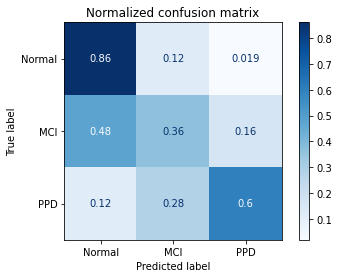

Normalized confusion matrix
[[0.8442953  0.13020134 0.02550336]
 [0.5399061  0.33333333 0.12676056]
 [0.13333333 0.3        0.56666667]]


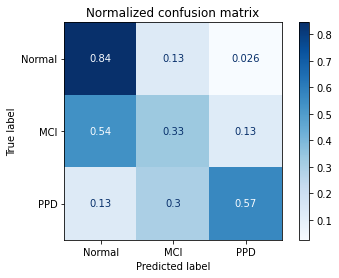

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & clincogidx
data = np.stack((moca[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & clincogidx
data = np.stack((moca[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
len(data1)

5250

In [ ]:
#deterministc scores
# moca
#moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & clincogidx
data = np.stack((moca[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_test, labels=[1, 2, 3],normalize='true'))


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7367074210975263 and 0.49909039209670586
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7224466243508367 and 0.483980939328673
[[0.76174497 0.21275168 0.02550336]
 [0.40375587 0.46948357 0.12676056]
 [0.         0.43333333 0.56666667]]


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.067, total=   0.4s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.067, total=   0.4s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.356, total=   0.4s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.423, total=   0.4s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.311, total=   0.4s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.067, total=   0.4s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.067, total=   0.4s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.356, total=   0.4s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.423, total=   0.4s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   55.1s finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7489352640545145 and 0.5076779405770239
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7535667963683528 and 0.48694292357626257
Normalized confusion matrix
[[0.78051157 0.20243605 0.01705238]
 [0.22796935 0.48275862 0.28927203]
 [0.05797101 0.05797101 0.88405797]]


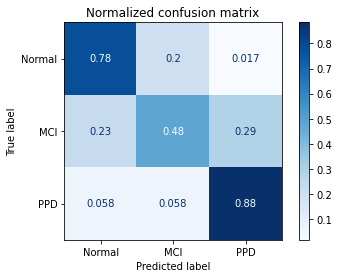

Normalized confusion matrix
[[0.79030663 0.19040554 0.01928783]
 [0.18287938 0.45914397 0.35797665]
 [0.05882353 0.14705882 0.79411765]]


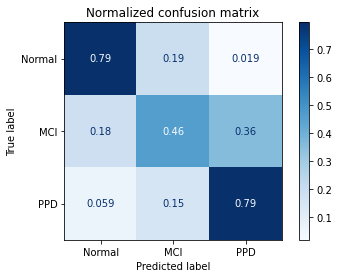

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & clincogidx
data = np.stack((npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.011, total=   0.7s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.073, total=   0.7s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.073, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.073, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.073, total=   0.7s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.546, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.562, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.534, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.492, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.7min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.8051837083452008 and 0.584505367109438
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8028901734104046 and 0.5936079249217935
Normalized confusion matrix
[[0.84172185 0.14668874 0.0115894 ]
 [0.25522042 0.54292343 0.20185615]
 [0.03333333 0.11666667 0.85      ]]


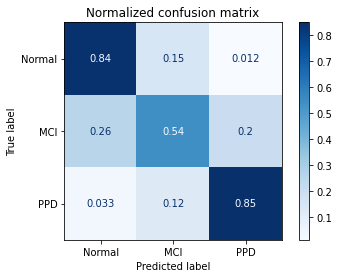

Normalized confusion matrix
[[0.84072581 0.14986559 0.0094086 ]
 [0.28301887 0.52358491 0.19339623]
 [0.03333333 0.06666667 0.9       ]]


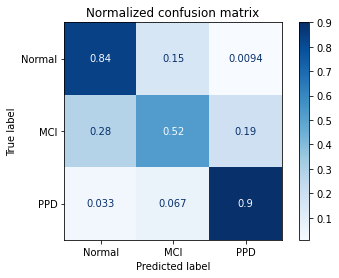

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#moca & performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & npcogidx & clincogidx
data = np.stack((moca[idx],npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
# moca
#moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & npcogidx & clincogidx
data = np.stack((moca[idx],npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
len(labels)

training prediction accuracy and F1-score of np1cog, moca, education and age 0.7373967530618057 and 0.49649330700492683
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7213872832369942 and 0.4899416925421105


5241

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.474, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.439, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.444, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.459, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.493, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.474, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.439, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.444, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.459, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.5min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7136764287745238 and 0.48219723905514617
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7120600115406809 and 0.46830682215295205
Normalized confusion matrix
[[0.74768519 0.22420635 0.02810847]
 [0.31177829 0.47806005 0.21016166]
 [0.05       0.25       0.7       ]]


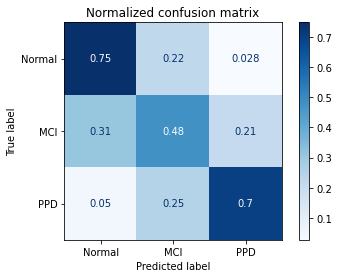

Normalized confusion matrix
[[0.75033557 0.21610738 0.03355705]
 [0.34741784 0.45539906 0.1971831 ]
 [0.         0.36666667 0.63333333]]


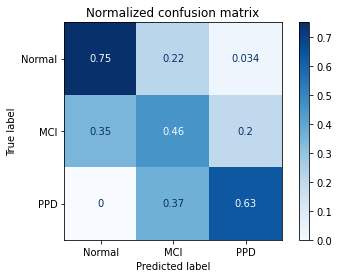

In [ ]:

#moca & age & educperformance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.474, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.444, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.457, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.494, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.474, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.444, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.457, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.4min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7020187659937447 and 0.47404758487051674
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.6976341604154646 and 0.4558458219389423
Normalized confusion matrix
[[0.73445767 0.23578042 0.0297619 ]
 [0.29099307 0.47113164 0.23787529]
 [0.03333333 0.23333333 0.73333333]]


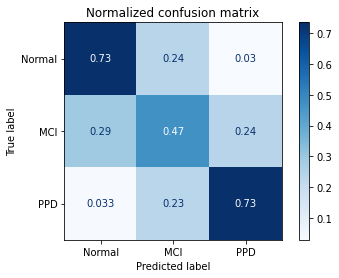

Normalized confusion matrix
[[0.73758389 0.22214765 0.04026846]
 [0.36150235 0.41784038 0.22065728]
 [0.         0.3        0.7       ]]


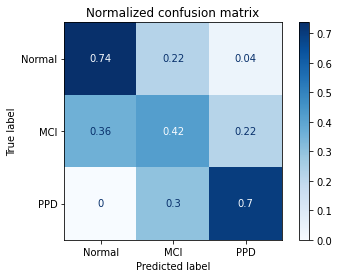

In [ ]:

#moca & age & educ & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#moca & age & educperformance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
len(labels)

training prediction accuracy and F1-score of np1cog, moca, education and age 0.7367074210975263 and 0.49909039209670586
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7224466243508367 and 0.483980939328673


5250

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.334, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.350, total=   0.5s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.326, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.304, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.333, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.334, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.350, total=   0.5s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.326, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.304, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.3min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7536201022146508 and 0.5300607360094896
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7578901859057501 and 0.5056573178679885
Normalized confusion matrix
[[0.78051157 0.20828258 0.01120585]
 [0.22796935 0.52681992 0.24521073]
 [0.05797101 0.07246377 0.86956522]]


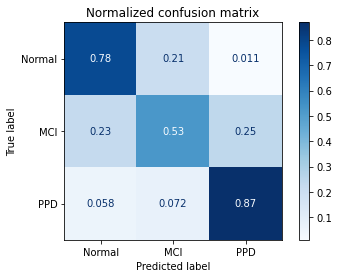

Normalized confusion matrix
[[0.79030663 0.19732938 0.012364  ]
 [0.18287938 0.49805447 0.31906615]
 [0.05882353 0.14705882 0.79411765]]


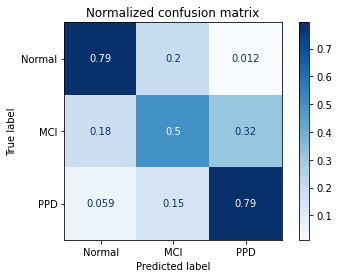

In [ ]:

#npcog & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.333, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.348, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.326, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.307, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.333, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.333, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.348, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.326, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.307, total=   0.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.3min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7772572402044293 and 0.5412818638865192
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7730220492866408 and 0.5125199123720515
Normalized confusion matrix
[[0.80998782 0.17978076 0.01023143]
 [0.24712644 0.50957854 0.24329502]
 [0.05797101 0.08695652 0.85507246]]


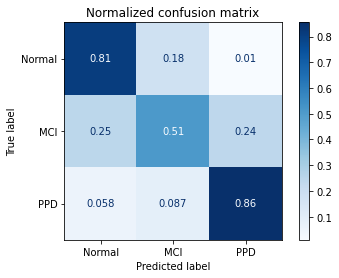

Normalized confusion matrix
[[0.80959446 0.17804154 0.012364  ]
 [0.20233463 0.48249027 0.3151751 ]
 [0.05882353 0.14705882 0.79411765]]


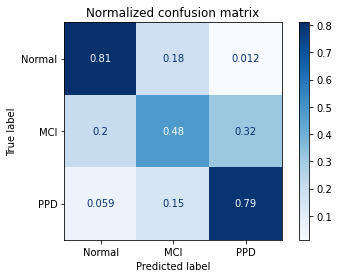

In [ ]:

#npcog & age & educ & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#npcog & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)


training prediction accuracy and F1-score of np1cog, moca, education and age 0.5481260647359455 and 0.32551145050503105
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.5460440985732814 and 0.3324266875786348


In [ ]:
idx= symdigidx & mocaidx & npcogidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((symdig[idx],moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)
len(labels)

5212

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.466, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.445, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.477, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.487, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.467, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.466, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.445, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.477, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.487, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.6min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.8051837083452008 and 0.5879031550553558
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8023121387283237 and 0.6001891746029947
Normalized confusion matrix
[[0.83807947 0.15       0.01192053]
 [0.2412993  0.57308585 0.18561485]
 [0.03333333 0.15       0.81666667]]


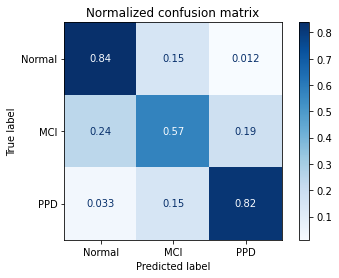

Normalized confusion matrix
[[0.83333333 0.15725806 0.0094086 ]
 [0.24528302 0.5754717  0.17924528]
 [0.03333333 0.1        0.86666667]]


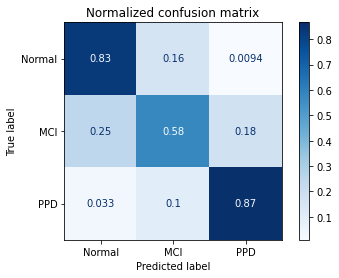

In [ ]:

#npcog & moca & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.445, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.477, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.487, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.467, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.445, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.477, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.487, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.9min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.8023355169467388 and 0.5874117935857774
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8017341040462428 and 0.6016986974239947
Normalized confusion matrix
[[0.83344371 0.15496689 0.0115894 ]
 [0.225058   0.5800464  0.19489559]
 [0.05       0.11666667 0.83333333]]


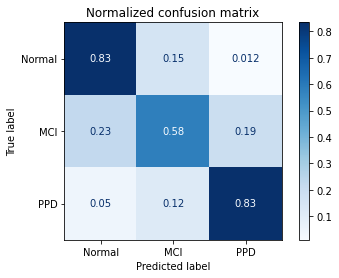

Normalized confusion matrix
[[0.83198925 0.15927419 0.00873656]
 [0.24056604 0.58018868 0.17924528]
 [0.03333333 0.1        0.86666667]]


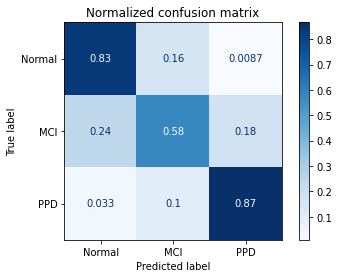

In [ ]:

#npcog & moca & age & educ & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & sexidx & mocaidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],moca[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#npcog & moca & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7373967530618057 and 0.49649330700492683
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7213872832369942 and 0.4899416925421105


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.426, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.457, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.460, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.426, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.457, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.460, total=   0.2s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.7min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7234772662281956 and 0.4677603220873508
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.722576900754498 and 0.47329849849422206
Normalized confusion matrix
[[0.76002652 0.20185615 0.03811734]
 [0.27336449 0.46495327 0.26168224]
 [0.01923077 0.25       0.73076923]]


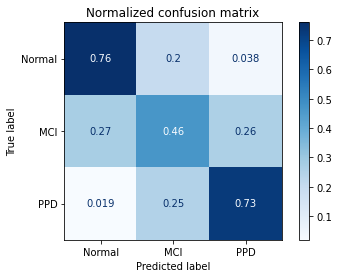

Normalized confusion matrix
[[0.76110363 0.20121131 0.03768506]
 [0.28909953 0.43601896 0.27488152]
 [0.         0.15384615 0.84615385]]


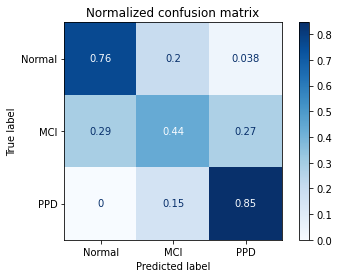

In [ ]:

#moca & sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range  C 0.2
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.438, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.425, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.457, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.460, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.438, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.425, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.457, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.460, total=   0.2s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.6min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7223334286531312 and 0.4658426659404184
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7196749854904236 and 0.46380222774374386
Normalized confusion matrix
[[0.75836924 0.20351342 0.03811734]
 [0.26635514 0.46962617 0.26401869]
 [0.01923077 0.26923077 0.71153846]]


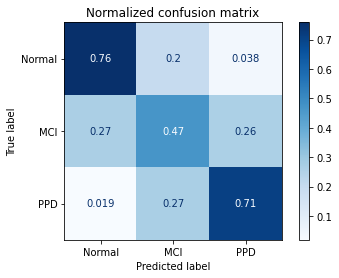

Normalized confusion matrix
[[0.76043069 0.19986541 0.0397039 ]
 [0.28909953 0.42180095 0.28909953]
 [0.         0.19230769 0.80769231]]


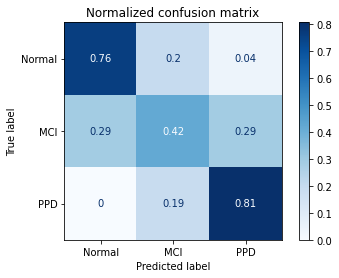

In [ ]:

#moca & sym_digit & age & educ & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range  C 0.2
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#moca & sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

training prediction accuracy and F1-score of np1cog, moca, education and age 0.7317700886474121 and 0.4716263204178977
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7324434126523506 and 0.48885140844567326


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.443, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.443, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.463, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.410, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.462, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.443, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.443, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.463, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.410, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.4min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7938468992248062 and 0.5604885469962263
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.772369714847591 and 0.5407551167346579
Normalized confusion matrix
[[0.82262997 0.16791771 0.00945232]
 [0.21383648 0.56813417 0.21802935]
 [0.05555556 0.07407407 0.87037037]]


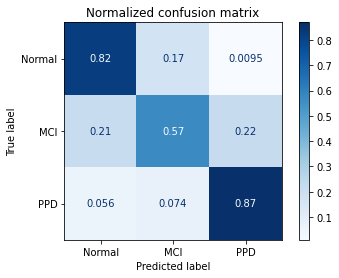

Normalized confusion matrix
[[0.79909707 0.18905192 0.01185102]
 [0.21702128 0.56170213 0.2212766 ]
 [0.         0.14814815 0.85185185]]


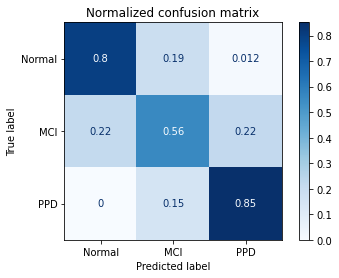

In [ ]:

#npcog & sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.442, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.445, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.462, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.411, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.462, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.442, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.445, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.462, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.411, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.3min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7933624031007752 and 0.5529272951339719
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7733529990167158 and 0.5268750700147674
Normalized confusion matrix
[[0.82290798 0.16430359 0.01278843]
 [0.20754717 0.55974843 0.2327044 ]
 [0.05555556 0.05555556 0.88888889]]


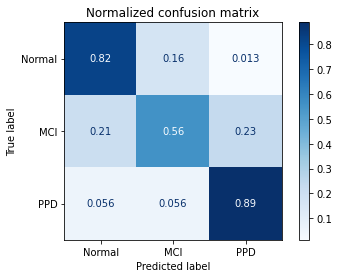

Normalized confusion matrix
[[0.80248307 0.18227991 0.01523702]
 [0.20851064 0.54893617 0.24255319]
 [0.         0.18518519 0.81481481]]


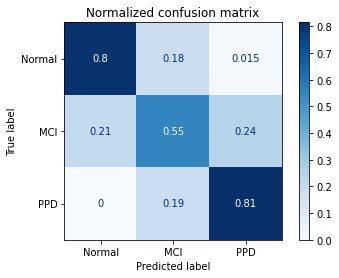

In [ ]:

#npcog & sym_digit & age & educ & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#npcog & sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

training prediction accuracy and F1-score of np1cog, moca, education and age 0.625968992248062 and 0.34871585281920725
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.6057030481809242 and 0.3068983347940403


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.446, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.435, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.474, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.447, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.438, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.446, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.435, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.474, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.447, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.1min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7958190148911798 and 0.5713660863171766
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8023255813953488 and 0.5783124220426692
Normalized confusion matrix
[[0.82708264 0.16229671 0.01062064]
 [0.22482436 0.56908665 0.20608899]
 [0.03846154 0.11538462 0.84615385]]


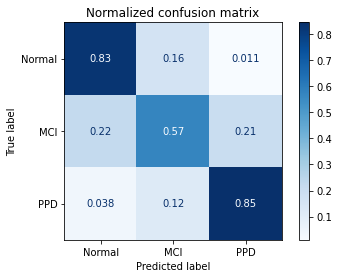

Normalized confusion matrix
[[0.83153639 0.16239892 0.00606469]
 [0.1952381  0.6        0.2047619 ]
 [0.         0.23076923 0.76923077]]


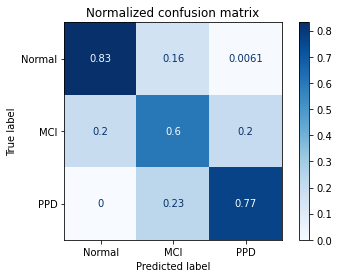

In [ ]:

#npcog & moca & sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.447, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.434, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.474, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.447, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.438, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.447, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.434, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.474, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.447, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.1min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7983963344788088 and 0.5716489527909959
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8011627906976744 and 0.576917992822895
Normalized confusion matrix
[[0.83040159 0.15964155 0.00995685]
 [0.22482436 0.56908665 0.20608899]
 [0.03846154 0.13461538 0.82692308]]


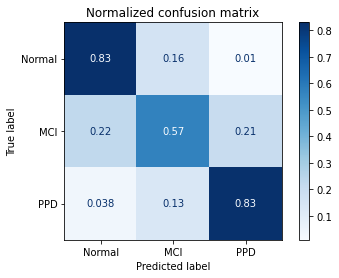

Normalized confusion matrix
[[0.83153639 0.16307278 0.00539084]
 [0.19047619 0.58571429 0.22380952]
 [0.         0.19230769 0.80769231]]


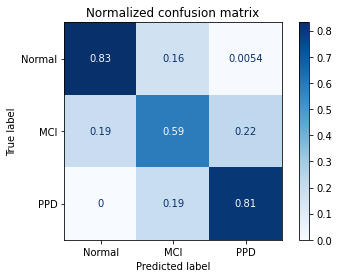

In [ ]:

#npcog & moca & sym_digit & age & educ & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((npcog[idx],moca[idx],symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:6].astype(float)
labels=data1[:,6].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#npcog & moca & sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

training prediction accuracy and F1-score of np1cog, moca, education and age 0.7325315005727376 and 0.47041614166358725
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7313953488372092 and 0.49283084897406687


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.426, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.438, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.441, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.427, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.445, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.426, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.438, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.441, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.427, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  6.7min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.6857626299250664 and 0.44097723141637574
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.6589793915603532 and 0.4225955092487161
Normalized confusion matrix
[[0.71595007 0.24937587 0.03467406]
 [0.30543933 0.45188285 0.24267782]
 [0.03703704 0.22222222 0.74074074]]


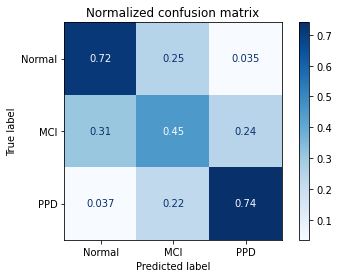

Normalized confusion matrix
[[0.68619718 0.27211268 0.04169014]
 [0.29661017 0.44491525 0.25847458]
 [0.         0.25925926 0.74074074]]


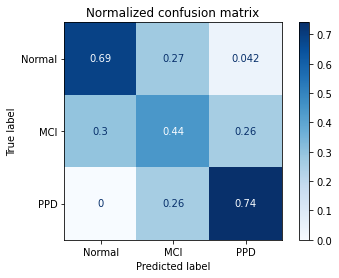

In [ ]:

#sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.426, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.437, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.438, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.429, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.445, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.426, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.438, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.429, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  7.1min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.6857626299250664 and 0.44097723141637574
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.6589793915603532 and 0.4225955092487161
Normalized confusion matrix
[[0.71595007 0.24937587 0.03467406]
 [0.30543933 0.45188285 0.24267782]
 [0.03703704 0.22222222 0.74074074]]


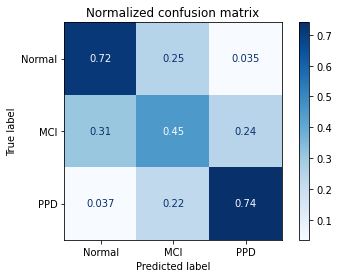

Normalized confusion matrix
[[0.68619718 0.27211268 0.04169014]
 [0.29661017 0.44491525 0.25847458]
 [0.         0.25925926 0.74074074]]


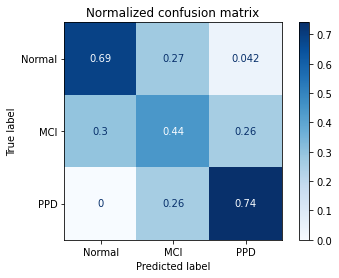

In [ ]:
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= symdigidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#sym_digit & age & educ performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= symdigidx & bdtidx & educidx & mocadtidx & clincogidx
data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

training prediction accuracy and F1-score of np1cog, moca, education and age 0.6246072032874064 and 0.34884848409659786
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.6069676153091266 and 0.30705424962894695


In [ ]:
# weight and height for BMI index
weight=df.wgtkg
weightidx=~(weight.isnull())
height=df.htcm
heightidx=~(height.isnull())

# supine blood pressure 
syssup=df.syssup
syssupidx=~(syssup.isnull())
diasup=df.diasup
diasupidx=~(diasup.isnull())

# standing blood pressure 
sysstnd=df.sysstnd
sysstndidx=~(sysstnd.isnull())
diastnd=df.diastnd
diastndidx=~(diastnd.isnull())

#Schwab and England activities
mseadlg=df.mseadlg
mseadlgidx=~(mseadlg.isnull())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.494, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.512, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.525, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.535, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.501, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.494, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.512, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.525, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.535, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.501, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.1min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7960986382039014 and 0.6037350138079216
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.765496639283047 and 0.5534705002883665
Normalized confusion matrix
[[0.8181027  0.17362924 0.00826806]
 [0.17287234 0.65691489 0.17021277]
 [0.04651163 0.11627907 0.8372093 ]]


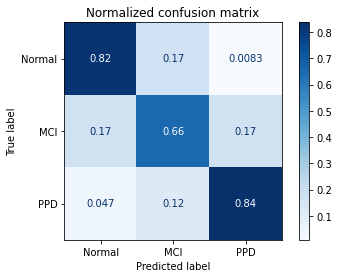

Normalized confusion matrix
[[0.80052957 0.18976169 0.00970874]
 [0.24864865 0.54594595 0.20540541]
 [0.         0.19047619 0.80952381]]


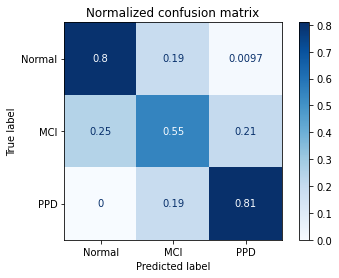

In [ ]:

#npcog & moca & sym_digit & age & educ & gender & BMI performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & mseadlgidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],mseadlg[idx],bmi,symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:8].astype(float)
labels=data1[:,8].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
idx= npcogidx & mocaidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],bmi,symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:7].astype(float)
labels=data1[:,7].astype(float)
len(labels)

4860

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.549, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.501, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.515, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.471, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.539, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.549, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.501, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.515, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.471, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.539, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 15.1min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7930524759793053 and 0.6158543388871799
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7726931732933233 and 0.5469142536984241
Normalized confusion matrix
[[0.81258191 0.18086501 0.00655308]
 [0.19733333 0.672      0.13066667]
 [0.04761905 0.14285714 0.80952381]]


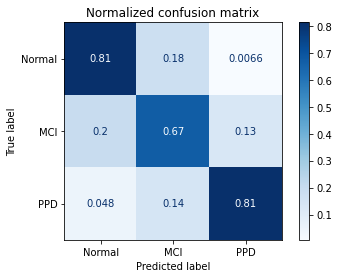

Normalized confusion matrix
[[0.80319149 0.18971631 0.0070922 ]
 [0.18478261 0.59782609 0.2173913 ]
 [0.         0.33333333 0.66666667]]


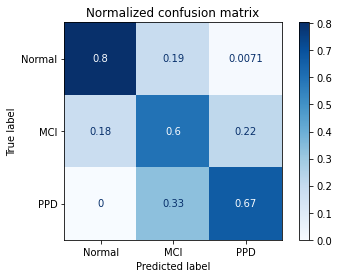

In [ ]:

#npcog & moca & sym_digit & age & educ & gender & BMI & syssup & diasup & sysstnd & diastnd performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & mseadlgidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],mseadlg[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:12].astype(float)
labels=data1[:,12].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
idx= npcogidx & mocaidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:11].astype(float)
labels=data1[:,11].astype(float)
len(labels)

4841

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.545, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.527, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.501, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.485, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.494, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.545, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.527, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.501, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.485, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.494, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 11.2min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7999264435454211 and 0.6241691038881115
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7731343283582089 and 0.5729517471696036
Normalized confusion matrix
[[0.81952921 0.173932   0.0065388 ]
 [0.17195767 0.67724868 0.15079365]
 [0.         0.17021277 0.82978723]]


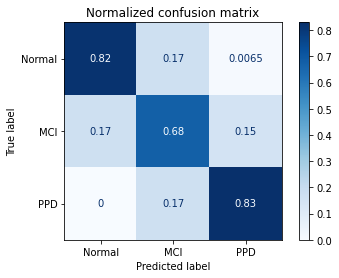

Normalized confusion matrix
[[0.80707965 0.18230088 0.01061947]
 [0.25268817 0.56451613 0.1827957 ]
 [0.04166667 0.16666667 0.79166667]]


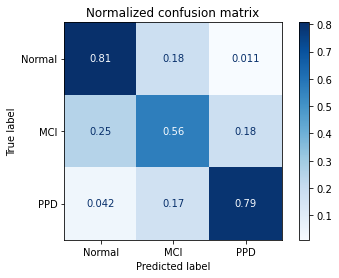

In [ ]:

#npcog & moca & age & educ & gender & BMI & syssup & diasup & sysstnd & diastnd performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & mseadlgidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],mseadlg[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:11].astype(float)
labels=data1[:,11].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:10].astype(float)
labels=data1[:,10].astype(float)
len(labels)

4862

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.399, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.436, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.448, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.399, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.436, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.4min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7417380660954712 and 0.45004514545032653
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.739692001987084 and 0.4312656077719985
Normalized confusion matrix
[[0.80997151 0.14358974 0.04643875]
 [0.51873767 0.27218935 0.20907298]
 [0.10294118 0.17647059 0.72058824]]


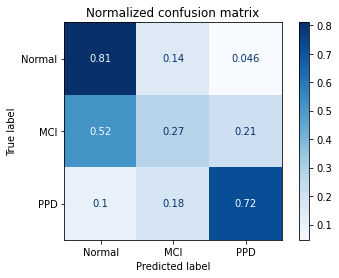

Normalized confusion matrix
[[0.8189705  0.14632736 0.03470214]
 [0.54       0.2        0.26      ]
 [0.17647059 0.14705882 0.67647059]]


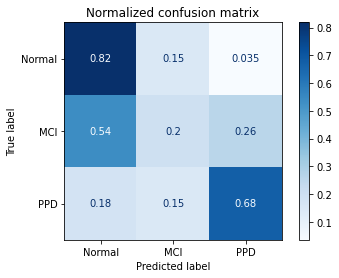

In [ ]:

#mseadlg 
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
idx= mseadlgidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((mseadlg[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.479, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.528, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.531, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.474, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.479, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.528, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.531, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.474, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.2min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7266826101810727 and 0.5200778116703384
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7246879334257975 and 0.5285883386618648
Normalized confusion matrix
[[0.77346939 0.20938776 0.01714286]
 [0.35731415 0.45323741 0.18944844]
 [0.03333333 0.25       0.71666667]]


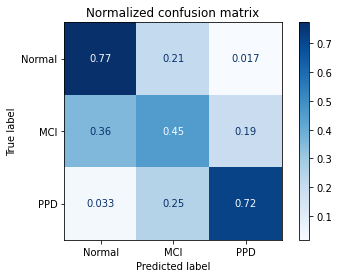

Normalized confusion matrix
[[0.76801988 0.21375311 0.01822701]
 [0.36407767 0.46601942 0.16990291]
 [0.06896552 0.17241379 0.75862069]]


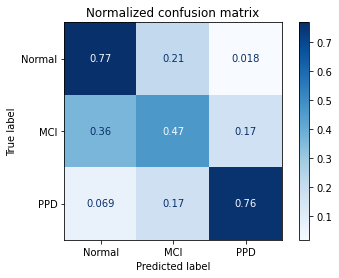

In [ ]:

#moca & mseadlg
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
idx= mocaidx & mseadlgidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.497, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.549, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.548, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.499, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.497, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.549, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.548, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.499, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.5min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.716433208062863 and 0.5207797366197187
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7163661581137309 and 0.5270498767834334
Normalized confusion matrix
[[0.75306122 0.22571429 0.02122449]
 [0.30695444 0.4940048  0.19904077]
 [0.01666667 0.21666667 0.76666667]]


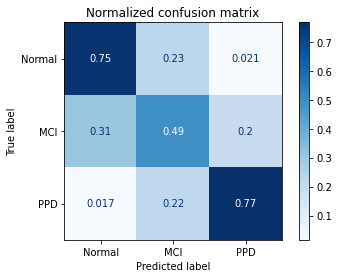

Normalized confusion matrix
[[0.74316487 0.22866611 0.02816901]
 [0.25728155 0.54368932 0.19902913]
 [0.06896552 0.10344828 0.82758621]]


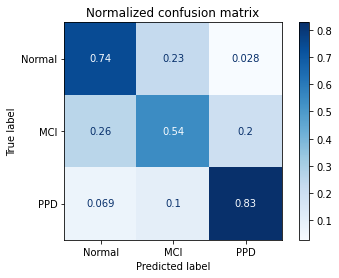

In [ ]:

#moca & mseadlg & age & educ
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
idx= mocaidx & mseadlgidx & bdtidx & educidx & mocadtidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.495, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.549, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.548, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.496, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.495, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.549, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.548, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.496, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.4min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7137000341646738 and 0.5193037313827998
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7108183079056866 and 0.5252178164361162
Normalized confusion matrix
[[0.74979592 0.22897959 0.02122449]
 [0.30695444 0.4940048  0.19904077]
 [0.01666667 0.21666667 0.76666667]]


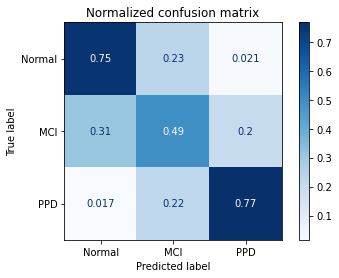

Normalized confusion matrix
[[0.73487987 0.23695112 0.02816901]
 [0.24757282 0.55339806 0.19902913]
 [0.06896552 0.10344828 0.82758621]]


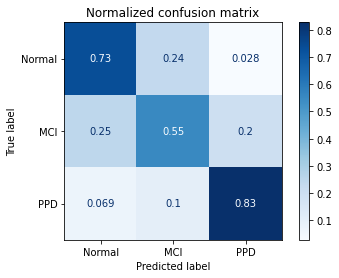

In [ ]:

#moca & mseadlg & age & educ & gender
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
idx= mocaidx & mseadlgidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],age[idx],educ[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.508, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.495, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.498, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.452, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.508, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.495, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.498, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.452, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.0min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7206742346061231 and 0.5089534613487522
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7194696441032798 and 0.5231048264926224
Normalized confusion matrix
[[0.75399099 0.22390503 0.02210397]
 [0.27118644 0.52300242 0.20581114]
 [0.         0.2745098  0.7254902 ]]


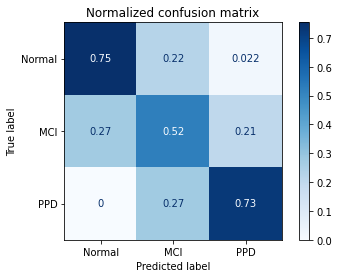

Normalized confusion matrix
[[0.74833887 0.22425249 0.02740864]
 [0.29064039 0.53694581 0.17241379]
 [0.         0.19230769 0.80769231]]


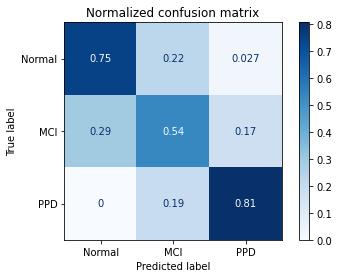

In [ ]:

#moca & mseadlg & symdig & age & educ 
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
idx= mocaidx & mseadlgidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.508, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.495, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.498, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.452, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.508, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.466, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.495, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.498, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.452, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.6min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7199862401100792 and 0.5152532465750979
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7215631542219121 and 0.5272428382130906
Normalized confusion matrix
[[0.75194433 0.22963569 0.01841998]
 [0.26634383 0.52784504 0.20581114]
 [0.         0.25490196 0.74509804]]


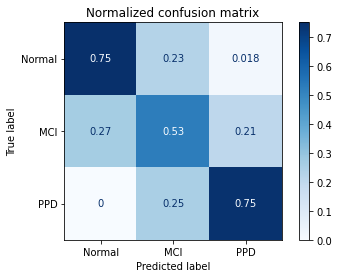

Normalized confusion matrix
[[0.74916944 0.22591362 0.02491694]
 [0.27586207 0.54679803 0.1773399 ]
 [0.         0.19230769 0.80769231]]


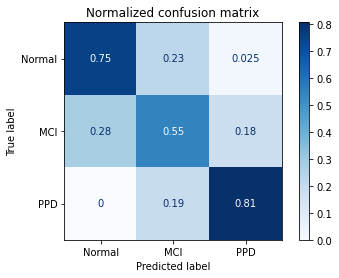

In [ ]:

#moca & mseadlg & symdig & age & educ & gender
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
idx= mocaidx & mseadlgidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],symdig[idx],age[idx],educ[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:6].astype(float)
labels=data1[:,6].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.499, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.522, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.502, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.538, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.559, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.499, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.522, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.502, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.538, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.559, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.9min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7880862718247176 and 0.6049481535048885
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7797081306462822 and 0.6191557761137686
Normalized confusion matrix
[[0.81561733 0.17620605 0.00817661]
 [0.2        0.62891566 0.17108434]
 [0.01666667 0.21666667 0.76666667]]


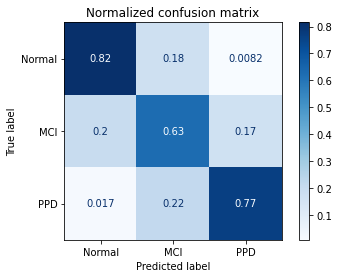

Normalized confusion matrix
[[0.8033195  0.18672199 0.00995851]
 [0.21463415 0.6195122  0.16585366]
 [0.03448276 0.03448276 0.93103448]]


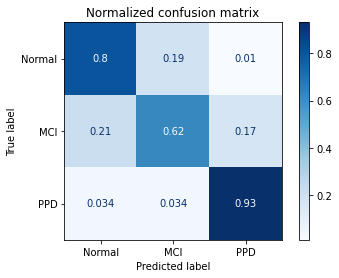

In [ ]:

#moca & npcog & mseadlg & age & educ 
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
idx= mocaidx & npcogidx & mseadlgidx & bdtidx & educidx & mocadtidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],npcog[idx],mseadlg[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.498, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.522, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.503, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.541, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.559, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.498, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.522, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.503, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.541, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.559, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.9min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7863745292707977 and 0.6048129668214016
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7810979847116053 and 0.616798424052439
Normalized confusion matrix
[[0.81234669 0.17906787 0.00858545]
 [0.19518072 0.63614458 0.1686747 ]
 [0.01666667 0.21666667 0.76666667]]


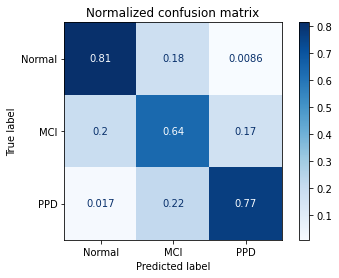

Normalized confusion matrix
[[0.80580913 0.18506224 0.00912863]
 [0.21463415 0.6195122  0.16585366]
 [0.03448276 0.06896552 0.89655172]]


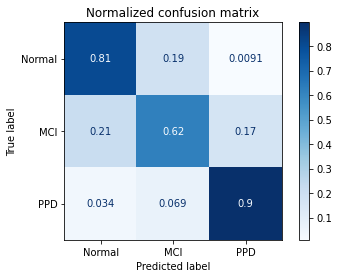

In [ ]:

#moca & npcog & mseadlg & age & educ & gender
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
idx= mocaidx & npcogidx & mseadlgidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],npcog[idx],mseadlg[idx],age[idx],educ[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:6].astype(float)
labels=data1[:,6].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# train/test with clinician confidence score

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.556, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.586, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.519, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.545, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.624, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.556, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.586, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.519, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.545, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.624, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   24.0s finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.8539365871036694 and 0.5509807894848128
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8489884393063584 and 0.4938228125594992
Normalized confusion matrix
[[0.87870722 0.11520913 0.00608365]
 [0.42253521 0.45070423 0.12676056]
 [0.         0.37142857 0.62857143]]


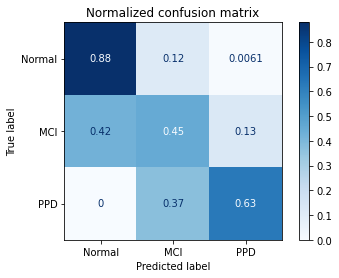

Normalized confusion matrix
[[0.87586739 0.11256746 0.01156515]
 [0.45714286 0.45714286 0.08571429]
 [0.05882353 0.52941176 0.41176471]]


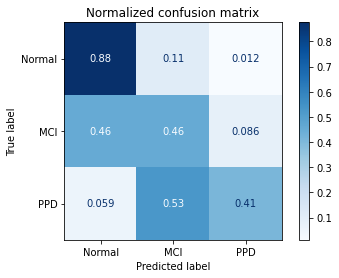

In [ ]:

from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#moca  performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0

idx= mocaidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, out_test, labels=[1, 2, 3],normalize='true'))


[[0.87586739 0.11256746 0.01156515]
 [0.45714286 0.45714286 0.08571429]
 [0.05882353 0.52941176 0.41176471]]


In [ ]:
testdata = np.arange(0.0, 30.0, 0.5).reshape(-1,1)
out=model.predict(testdata)
t1 = testdata[np.where(out==2)[0].min()] - 0.5
t2 = testdata[np.where(out==1)[0].min()] - 0.5

In [ ]:
t2

array([24.5])

In [ ]:
#deterministc scores
#moca  performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0

idx= mocaidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_train, y_pred_train, labels=[1, 2, 3],normalize='true'))


training prediction accuracy and F1-score of np1cog, moca, education and age 0.781617385108657 and 0.50099619696157
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7846820809248555 and 0.45681062295965597
[[0.79391635 0.19277567 0.01330798]
 [0.24647887 0.57746479 0.17605634]
 [0.         0.31428571 0.68571429]]


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.335, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.324, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.007, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.029, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.029, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.335, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.324, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.007, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.029, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   34.8s finished


testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8182778658214475 and 0.5741460625394651
Normalized confusion matrix
[[0.8140884  0.1839779  0.0019337 ]
 [0.23595506 0.69662921 0.06741573]
 [0.02272727 0.40909091 0.56818182]]


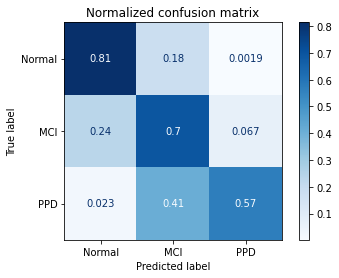

Normalized confusion matrix
[[0.82511211 0.17264574 0.00224215]
 [0.18181818 0.73863636 0.07954545]
 [0.0952381  0.33333333 0.57142857]]


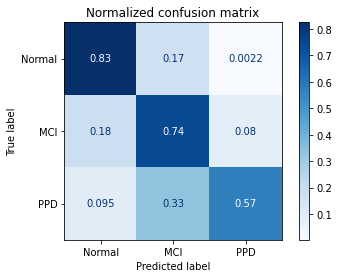

In [ ]:

from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0

idx= npcogidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.570, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.561, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.510, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.582, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.615, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.570, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.561, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.510, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.582, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.615, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   20.1s finished


Normalized confusion matrix
[[0.86067758 0.13589646 0.00342596]
 [0.21276596 0.66666667 0.12056738]
 [0.         0.2        0.8       ]]


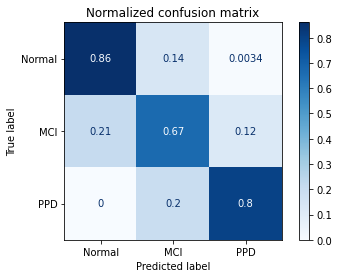

Normalized confusion matrix
[[0.8763524  0.12132921 0.00231839]
 [0.3        0.62857143 0.07142857]
 [0.05882353 0.29411765 0.64705882]]


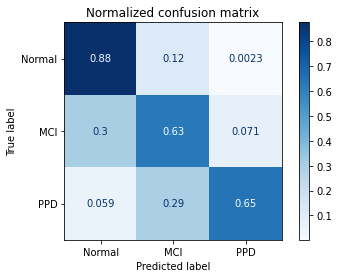

In [ ]:

from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#moca & npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0

idx= mocaidx & npcogidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.570, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.564, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.512, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.581, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.620, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.570, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.564, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.512, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.581, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.620, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   21.3s finished


Normalized confusion matrix
[[0.86220023 0.13437381 0.00342596]
 [0.21276596 0.66666667 0.12056738]
 [0.         0.2        0.8       ]]


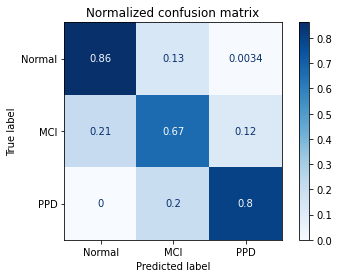

Normalized confusion matrix
[[0.87789799 0.11978362 0.00231839]
 [0.3        0.62857143 0.07142857]
 [0.05882353 0.29411765 0.64705882]]


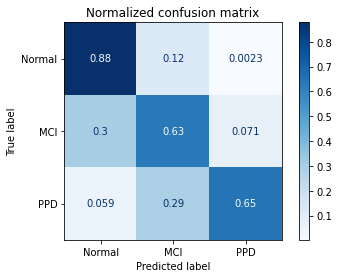

In [ ]:

from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

#moca & npcog & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0

idx= mocaidx & npcogidx & sexidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#moca & npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0

idx= mocaidx & npcogidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

training prediction accuracy and F1-score of np1cog, moca, education and age 0.7813057438458794 and 0.4997874761213043
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7856625633598842 and 0.4565236929295285


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.465, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.498, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.484, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.488, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.519, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.465, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.498, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.484, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.488, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.519, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.5min finished


Normalized confusion matrix
[[0.77452471 0.21406844 0.01140684]
 [0.22535211 0.63380282 0.14084507]
 [0.         0.31428571 0.68571429]]


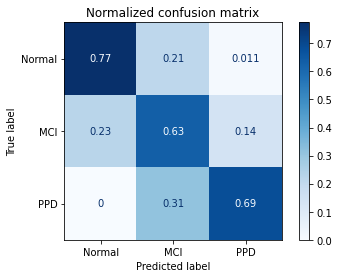

Normalized confusion matrix
[[0.78565921 0.20277564 0.01156515]
 [0.34285714 0.55714286 0.1       ]
 [0.05882353 0.52941176 0.41176471]]


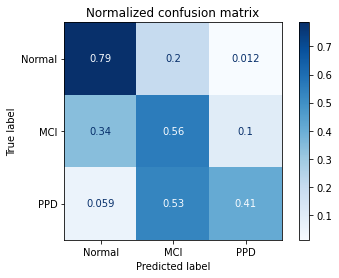

In [ ]:

#moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.467, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.497, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.483, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.488, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.520, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.467, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.497, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.483, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.488, total=   0.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.520, total=   0.1s
[CV] C=0.0001, gamma=0.01, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.6min finished


testing prediction accuracy and F1-score of np1cog, moca, education and age 0.773121387283237 and 0.4582363889766974
Normalized confusion matrix
[[0.7730038  0.21558935 0.01140684]
 [0.23239437 0.62676056 0.14084507]
 [0.         0.31428571 0.68571429]]


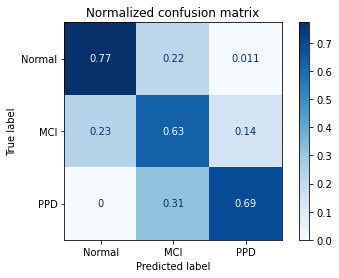

Normalized confusion matrix
[[0.79028527 0.19737857 0.01233616]
 [0.35714286 0.54285714 0.1       ]
 [0.05882353 0.52941176 0.41176471]]


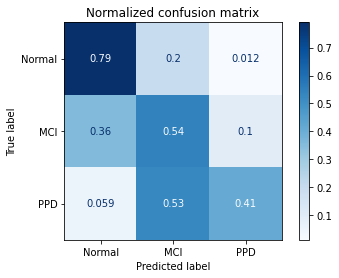

In [ ]:

#moca & age & education & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

training prediction accuracy and F1-score of np1cog, moca, education and age 0.781617385108657 and 0.50099619696157
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7846820809248555 and 0.45681062295965597


In [ ]:

#npcog & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

#npcog & age & education & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#npcog & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

In [ ]:

#symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:3].astype(float)
labels=data1[:,3].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

#symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= symdigidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

In [ ]:
#npcog & moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],moca[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & moca & age & education & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],moca[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#npcog & moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

In [ ]:
#moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

In [ ]:
#npcog & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & symdig & age & education & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],symdig[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#npcog & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

In [ ]:
#npcog & moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & moca & symdig & age & education & gender performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & sexidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((npcog[idx],moca[idx],sex[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:6].astype(float)
labels=data1[:,6].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#deterministc scores
#npcog & moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
data = np.stack((moca[idx],npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
y_pred_train=np.zeros(len(y_train))
y_pred_test=np.zeros(len(y_test))
for i in range(len(X_train)):
  if X_train[i,0] >= 26:
    y_pred_train[i]=1
  elif (X_train[i,0]<26) and (X_train[i,0]>=21):
    y_pred_train[i]=2
  elif (X_train[i,0]<21):
    y_pred_train[i]=3

for i in range(len(X_test)):
  if X_test[i,0] >= 26:
    y_pred_test[i]=1
  elif (X_test[i,0]<26) and (X_test[i,0]>=21):
    y_pred_test[i]=2
  elif (X_test[i,0]<21):
    y_pred_test[i]=3

acc1_train = sum(y_pred_train==y_train)/len(y_train)
f11_train = f1_score(y_train, y_pred_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

acc1_test = sum(y_pred_test==y_test)/len(y_test)
f11_test = f1_score(y_test, y_pred_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)

In [ ]:

#npcog & moca & age & educ & gender & BMI & syssup & diasup & sysstnd & diastnd performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & mseadlgidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],mseadlg[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:11].astype(float)
labels=data1[:,11].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:10].astype(float)
labels=data1[:,10].astype(float)
len(labels)

In [ ]:

#npcog & moca & symdig & age & educ & gender & BMI & syssup & diasup & sysstnd & diastnd performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & mseadlgidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],mseadlg[idx],symdig[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:12].astype(float)
labels=data1[:,12].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
idx= npcogidx & mocaidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],symdig[idx],bmi,syssup[idx],diasup[idx],sysstnd[idx],diastnd[idx],sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:11].astype(float)
labels=data1[:,11].astype(float)
len(labels)

In [ ]:

#npcog & moca & symdig & age & educ & gender & BMI performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
idx= npcogidx & mocaidx & mseadlgidx & symdigidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((npcog[idx],moca[idx],mseadlg[idx],symdig[idx],bmi,sex[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:8].astype(float)
labels=data1[:,8].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
idx= mocaidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)
len(labels)

In [ ]:

#mseadlg 
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
idx= mseadlgidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((mseadlg[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:1].astype(float)
labels=data1[:,1].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

#mseadlg & moca
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
idx= mocaidx & mseadlgidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:2].astype(float)
labels=data1[:,2].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

#mseadlg & moca & age & educ 
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
idx= mocaidx & mseadlgidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:4].astype(float)
labels=data1[:,4].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

#mseadlg & moca & age & educ & gender
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
idx= mocaidx & mseadlgidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],age[idx],educ[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

#mseadlg & moca & symdig & age & educ & gender
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
idx= mocaidx & mseadlgidx & symdigidx & bdtidx & educidx & mocadtidx & sexidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],mseadlg[idx],symdig[idx],age[idx],educ[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:6].astype(float)
labels=data1[:,6].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

#npcog & mseadlg & moca & age & educ
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
idx= mocaidx & npcogidx & mseadlgidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],npcog[idx],mseadlg[idx],age[idx],educ[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:5].astype(float)
labels=data1[:,5].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

#npcog & mseadlg & moca & age & educ & gender
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx & symdigidx
#idx= npcogidx & mocaidx & sexidx & bdtidx & educidx & mocadtidx & weightidx & heightidx & syssupidx & diasupidx & sysstndidx & diastndidx & clincogidx
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
idx= mocaidx & npcogidx & mseadlgidx & sexidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1
bmi=weight[idx]/(height[idx]*10**-2)**2
data = np.stack((moca[idx],npcog[idx],mseadlg[idx],age[idx],educ[idx],sex[idx],clincog[idx],eventid[idx],patno[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values
data=data1[:,:6].astype(float)
labels=data1[:,6].astype(float)

# defining parameter range 
param_grid = {'C': [0.0001,0.001,0.01,0.1,1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#Analysis by patient subjects (same patient shoud not be in train and test set)

In [ ]:
#npcog & moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
import random
patno = df.patno
patidx = ~(patno.isnull())
idx= npcogidx & mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((npcog[idx],moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
#data1= data[np.unique(data[:,[0,1,2,3,4,5]],return_index=True,axis=0)[1]]
data1=pd.DataFrame(data).drop_duplicates().values
pr=5  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
patno = df.patno
patidx = ~(patno.isnull())
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & npcogidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= symdigidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= npcogidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((npcog[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
import random
#moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca & npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & npcogidx & clincogidx

data = np.stack((moca[idx],npcog[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=2  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#analysis based on patient subjects with highest clinician confidence

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
#npcog & moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
patno = df.patno
patidx = ~(patno.isnull())
idx= npcogidx & mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((npcog[idx],moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=5  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
patno = df.patno
patidx = ~(patno.isnull())
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & npcogidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((moca[idx],npcog[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#npcog & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= npcogidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((npcog[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#moca & npcog performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx

idx= mocaidx & npcogidx & clincogidx & clinscoridx1

data = np.stack((moca[idx],npcog[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=2  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])
random.seed(500)
random.shuffle(pat)
training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]

count=0
for i in training_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=tmp[:,:pr]
    y_train=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_train=np.append(X_train,tmp[:,:pr],axis=0)
    y_train=np.append(y_train,tmp[:,pr],axis=0)
  count=count+1


count=0
for i in test_ind:
  if count==0:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=tmp[:,:pr]
    y_test=tmp[:,pr]
  else:
    tmp=data1[np.where(data1[:,pr+1] == i)]
    X_test=np.append(X_test,tmp[:,:pr],axis=0)
    y_test=np.append(y_test,tmp[:,pr],axis=0)
  count=count+1

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
model = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
model.fit(X_train, y_train)

out_train = model.predict(X_train)
acc1_train = sum(out_train==y_train)/len(y_train)
f11_train = f1_score(y_train, out_train, average='macro')
print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)

out_test = model.predict(X_test)
acc1_test = sum(out_test==y_test)/len(y_test)
f11_test = f1_score(y_test, out_test, average='macro')
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["Normal","MCI","PPD"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# when analyzed based on patient subjects, the train and test data may not be splitted in 70-30 ratio always, so we do a 10 fold cross validation
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
import random

patno = df.patno
patidx = ~(patno.isnull())

In [ ]:
#npcog & moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((npcog[idx],moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=5  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 

over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.487, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.610, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.472, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.444, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.472, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.487, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.610, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.472, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.444, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.5min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.805449591280654 and 0.6005911297295755
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7788586251621271 and 0.5284737180059281
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.498, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.435, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.471, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.475, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.389, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.498, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.435, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.471, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.475, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.9min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.8018533660397928 and 0.5826669716983633
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7887232663642255 and 0.6234078758800637
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.468, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.495, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.479, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.552, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.468, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.437, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.495, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.479, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.5min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7938060309698451 and 0.5920042976198787
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8105813193990856 and 0.5690934935942991
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.445, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.519, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.487, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.469, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.461, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.445, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.519, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.487, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.469, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.3min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7946257197696737 and 0.5879297133237122
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8178913738019169 and 0.5751714473825956
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.426, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.444, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.460, total=   0.2s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.459, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.426, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.462, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.444, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.460, total=   0.2s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.5min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.8116629464285714 and 0.5723004721424307
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7819410319410319 and 0.5711432947633394
training prediction accuracy and F1-score of np1cog, moca, education and age 0.8014795308977074 and 0.587098516902792
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7955991233336774 and 0.5734579659252452


In [ ]:
#npcog & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.361, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.442, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.435, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.482, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.380, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.361, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.442, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.435, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.482, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.7min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7868252516010978 and 0.5476031651493236
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.788268156424581 and 0.5915528925178827
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.420, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.482, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.420, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.433, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.474, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.420, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.482, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.420, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.433, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.8min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.8045234248788369 and 0.5619197321452963
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7796610169491526 and 0.572840850839423
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.437, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.458, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.406, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.448, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.470, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.437, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.458, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.406, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.448, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.5min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.7885514018691588 and 0.565688383855024
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.7720510095642933 and 0.5295302809905026
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.451, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.435, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.466, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.444, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.442, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.451, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.435, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.466, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.444, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.4min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.8034642032332564 and 0.5794415569529009
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8253275109170306 and 0.5619751555521046
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.426, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.446, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.456, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.424, total=   0.3s
[CV] C=0.0001, gamma=1, kernel=linear ................................
[CV] .... C=0.0001, gamma=1, kernel=linear, score=0.473, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.426, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.446, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.456, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .. C=0.0001, gamma=0.1, kernel=linear, score=0.424, total=   0.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  5.5min finished


training prediction accuracy and F1-score of np1cog, moca, education and age 0.794362292051756 and 0.5625026109332792
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.8107960741548528 and 0.5684786329488425
training prediction accuracy and F1-score of np1cog, moca, education and age 0.7955453147268212 and 0.5634310898071648
testing prediction accuracy and F1-score of np1cog, moca, education and age 0.795220753601982 and 0.5648755625697511


In [ ]:
#moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 

over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
#npcog & moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & mocaidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((npcog[idx],moca[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
#symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= symdigidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
#npcog & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((npcog[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
#moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= mocaidx & bdtidx & educidx & mocadtidx & clincogidx

data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
#npcog & moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & mocaidx & clincogidx

data = np.stack((npcog[idx],moca[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=2  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
l=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
    l=l+1
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/l, 'and', over_f1_test/l)

In [ ]:
#analysis based on confidence score

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
#npcog & moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((npcog[idx],moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=5  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
#npcog & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((npcog[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
# moca & symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= mocaidx & symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((moca[idx],symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
#npcog & moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & mocaidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((npcog[idx],moca[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=4  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
#symdig & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= symdigidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((symdig[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
#npcog & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((npcog[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
#moca & age & education performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= mocaidx & bdtidx & educidx & mocadtidx & clincogidx & clinscoridx1

data = np.stack((moca[idx],age[idx],educ[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=3  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
clinscor = df.cogdxcl
clinscoridx1 = clinscor<2.0
#npcog & moca performance
#idx = mocaidx & clincogidx & bdtidx & educidx & mocadtidx & npcogidx &symdigidx
fold=5
idx= npcogidx & mocaidx & clincogidx & clinscoridx1

data = np.stack((npcog[idx],moca[idx],clincog[idx],patno[idx],eventid[idx],),1)
data1=pd.DataFrame(data).drop_duplicates().values

pr=2  #no of predictors
data1=data1[:,:pr+2].astype(float)
pat=np.unique(data1[:,pr+1])

# defining parameter range 
param_grid = {'C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5, 1,10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit = True, verbose = 3, cv=5, scoring='f1_macro') 
over_acc1_train=0
over_acc1_test=0
over_f1_train=0
over_f1_test=0

k=0
#random.seed(0)
for f in range(fold):
  random.shuffle(pat)
  training_ind, test_ind = pat[:round(0.7*len(pat))], pat[round(0.7*len(pat)):]
  
  count=0
  for i in training_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=tmp[:,:pr]
      y_train=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_train=np.append(X_train,tmp[:,:pr],axis=0)
      y_train=np.append(y_train,tmp[:,pr],axis=0)
    count=count+1
  
  count=0
  for i in test_ind:
    if count==0:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=tmp[:,:pr]
      y_test=tmp[:,pr]
    else:
      tmp=data1[np.where(data1[:,pr+1] == i)]
      X_test=np.append(X_test,tmp[:,:pr],axis=0)
      y_test=np.append(y_test,tmp[:,pr],axis=0)
    count=count+1
  grid.fit(X_train, y_train)
  model = BaggingClassifier(base_estimator=grid.best_estimator_, n_estimators=50, random_state=314)
  model.fit(X_train, y_train)
  
  out_train = model.predict(X_train)
  acc1_train = sum(out_train==y_train)/len(y_train)
  f11_train = f1_score(y_train, out_train, average='macro')
  if acc1_train>=0.5:
    over_acc1_train=over_acc1_train+acc1_train
    over_f1_train=over_f1_train+f11_train
    k=k+1

  print('training prediction accuracy and F1-score of np1cog, moca, education and age', acc1_train, 'and', f11_train)
  
  out_test = model.predict(X_test)
  acc1_test = sum(out_test==y_test)/len(y_test)
  f11_test = f1_score(y_test, out_test, average='macro')
  if acc1_test>=0.5:
    over_acc1_test=over_acc1_test+acc1_test
    over_f1_test=over_f1_test+f11_test
  print('testing prediction accuracy and F1-score of np1cog, moca, education and age', acc1_test, 'and', f11_test)
#Generating the confusion matrix for cognition question and moca and education and age

print('training prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_train/k, 'and', over_f1_train/k)
print('testing prediction accuracy and F1-score of np1cog, moca, education and age', over_acc1_test/k, 'and', over_f1_test/k)

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 0.79,  0.2,   0.006],
                                              [  0.246,  0.63,  0.127],
                                              [  0,  0.37, 0.63]]), 
                      normalize    = False,
                      target_names = ['Normal', 'MCI', 'PDD'],
                      title        = "Normalized Confusion Matrix")

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 0.8,  0.18,   0.0115],
                                              [  0.414,  0.5,  0.0857],
                                              [  0,  0.588, 0.41]]), 
                      normalize    = False,
                      target_names = ['Normal', 'MCI', 'PDD'],
                      title        = "Normalized Confusion Matrix")

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 0.79,  0.1927,   0.013],
                                              [  0.246,  0.577,  0.176],
                                              [  0,  0.31, 0.686]]), 
                      normalize    = False,
                      target_names = ['Normal', 'MCI', 'PDD'],
                      title        = "Normalized Confusion Matrix")

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 0.8,  0.18,   0.015],
                                              [  0.414,  0.457,  0.129],
                                              [  0,  0.53, 0.47]]), 
                      normalize    = False,
                      target_names = ['Normal', 'MCI', 'PDD'],
                      title        = "Normalized Confusion Matrix")

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()